
# Hardness Train Model
### The function fron "common_functions.ipynb" is called to run the program
### All the charts and figures are saved in "plots\\hardness" folder

# 1. Import Libraries and files

## 1.1 Import Libraries

In [2]:
#Import Libraries
from pymatgen.core.composition import Composition, Element
from pymatgen.core.structure import SiteCollection
from matminer.featurizers.composition.alloy import Miedema, WenAlloys,YangSolidSolution
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition
from matminer.utils.data import MixingEnthalpy, DemlData
from matminer.utils import data_files #for importing "Miedema.csv" present inside package of Matminer library
from matplotlib.ticker import MultipleLocator # for minor tick lines
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import matplotlib.pyplot as plt

ef= ElementFraction()
stc = StrToComposition()

In [3]:
name='HV'

### Import midema

In [4]:
# Import csv files "Midema" to calculte input features
elem_prop_data = pd.read_csv('Miedema.csv')
VEC_elements = elem_prop_data.set_index('element')['valence_electrons'].to_dict()
shear_modulus_g = elem_prop_data.set_index('element')['shear_modulus'].to_dict()
bulk_modulus_b = elem_prop_data.set_index('element')['compressibility'].to_dict()

### Load datasets

In [5]:
# Load hardness data and Featurization
df = pd.read_csv('hardness.csv')
path = "hardness_model_files\\"
plot_path = "plots\\hardness"

## 1.2 Featurization

In [6]:
%run common_functions.ipynb
df = featurization(df)

StrToComposition:   0%|          | 0/706 [00:00<?, ?it/s]

ElementFraction:   0%|          | 0/706 [00:00<?, ?it/s]

## 1.3 Informations and Plots on collected datasets

In [7]:
df = df.loc[:, (df != 0).any(axis=0)]
    
cols = list(df.columns.values)    #Make a list of all of the columns in the df
set = df.astype(bool).sum(axis=0) # Extract the occurance of each element in the alloys

element_df = set.to_frame()      # Convert extracted the occurance of each element in dataframe

element_occurancy = element_df[7:]
element_occurancy.columns =['Occurance']
    

In [8]:
df

Alloys  Hardness (HV)    Phase Fabrication_type  \
0            (CuMnNi)80Zn20          109.0      FCC              NaN   
1    Cu26.6Mn26.6Ni26.6Zn20          109.0      FCC             CAST   
2              CuMnNiZn0.25          109.0      FCC             CAST   
3            Al0.25CoCrFeNi          111.5      FCC             CAST   
4             Al0.1CoCrFeNi          117.0      NaN             CAST   
..                      ...            ...      ...              ...   
701     Hf0.5Nb0.5Ta0.5TiZr          376.0      NaN             CAST   
702        Al0.5NbTiV2Zr0.5          622.9  BCC +Im            CAT-A   
703        Al0.5NbTiV2Zr1.5          613.7  BCC +Im            CAT-A   
704        Al0.5Nb0.5TiV2Zr          587.1  BCC +Im            CAT-A   
705     Al0.5Nb0.5TiV2Zr1.5          583.0  BCC +Im            CAT-A   

                                                   DOI  \
0            https://doi.org/10.1016/j.dib.2018.11.111   
1                                       Beniwal: Train   
2    https://www.nature.com/articles/s41597-020-007...   
3                                       Beniwal: Train   
4           https://doi.org/10.1016/j.jmst.2021.01.185   
..                                                 ...   
701                           237688.pdf (chalmers.se)   
702      https://doi.org/10.1016/j.jallcom.2022.166767   
703      https://doi.org/10.1016/j.jallcom.2022.166767   
704      https://doi.org/10.1016/j.jallcom.2022.166767   
705      https://doi.org/10.1016/j.jallcom.2022.166767   

                                                 Paper           composition  \
0    Database on the mechanical properties of high ...      (Cu, Mn, Ni, Zn)   
1                                                  NaN      (Cu, Mn, Ni, Zn)   
2    Expanded dataset of mechanical properties and ...      (Cu, Mn, Ni, Zn)   
3                                                  NaN  (Al, Co, Cr, Fe, Ni)   
4    Machine learning of phases and mechanical prop...  (Al, Co, Cr, Fe, Ni)   
..                                                 ...                   ...   
701                                                NaN  (Hf, Nb, Ta, Ti, Zr)   
702  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
703  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
704  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
705  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   

     StrToComposition Exceptions   Li    B    C   Mg        Al   Si   Sc  \
0                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3                            NaN  0.0  0.0  0.0  0.0  0.058824  0.0  0.0   
4                            NaN  0.0  0.0  0.0  0.0  0.024390  0.0  0.0   
..                           ...  ...  ...  ...  ...       ...  ...  ...   
701                          NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
702                          NaN  0.0  0.0  0.0  0.0  0.100000  0.0  0.0   
703                          NaN  0.0  0.0  0.0  0.0  0.083333  0.0  0.0   
704                          NaN  0.0  0.0  0.0  0.0  0.100000  0.0  0.0   
705                          NaN  0.0  0.0  0.0  0.0  0.090909  0.0  0.0   

           Ti         V        Cr        Mn        Fe        Co        Ni  \
0    0.000000  0.000000  0.000000  0.307692  0.000000  0.000000  0.307692   
1    0.000000  0.000000  0.000000  0.266533  0.000000  0.000000  0.266533   
2    0.000000  0.000000  0.000000  0.307692  0.000000  0.000000  0.307692   
3    0.000000  0.000000  0.235294  0.000000  0.235294  0.235294  0.235294   
4    0.000000  0.000000  0.243902  0.000000  0.243902  0.243902  0.243902   
..        ...       ...       ...       ...       ...       ...       ...   
701  0.285714  0.000000  0.000000  0.000000  0

In [9]:
%run common_functions.ipynb
df = df_element_number(df)

In [10]:
df

Alloys  Hardness (HV)    Phase Fabrication_type  \
0            (CuMnNi)80Zn20          109.0      FCC              NaN   
1    Cu26.6Mn26.6Ni26.6Zn20          109.0      FCC             CAST   
2              CuMnNiZn0.25          109.0      FCC             CAST   
3            Al0.25CoCrFeNi          111.5      FCC             CAST   
4             Al0.1CoCrFeNi          117.0      NaN             CAST   
..                      ...            ...      ...              ...   
701     Hf0.5Nb0.5Ta0.5TiZr          376.0      NaN             CAST   
702        Al0.5NbTiV2Zr0.5          622.9  BCC +Im            CAT-A   
703        Al0.5NbTiV2Zr1.5          613.7  BCC +Im            CAT-A   
704        Al0.5Nb0.5TiV2Zr          587.1  BCC +Im            CAT-A   
705     Al0.5Nb0.5TiV2Zr1.5          583.0  BCC +Im            CAT-A   

                                                   DOI  \
0            https://doi.org/10.1016/j.dib.2018.11.111   
1                                       Beniwal: Train   
2    https://www.nature.com/articles/s41597-020-007...   
3                                       Beniwal: Train   
4           https://doi.org/10.1016/j.jmst.2021.01.185   
..                                                 ...   
701                           237688.pdf (chalmers.se)   
702      https://doi.org/10.1016/j.jallcom.2022.166767   
703      https://doi.org/10.1016/j.jallcom.2022.166767   
704      https://doi.org/10.1016/j.jallcom.2022.166767   
705      https://doi.org/10.1016/j.jallcom.2022.166767   

                                                 Paper           composition  \
0    Database on the mechanical properties of high ...      (Cu, Mn, Ni, Zn)   
1                                                  NaN      (Cu, Mn, Ni, Zn)   
2    Expanded dataset of mechanical properties and ...      (Cu, Mn, Ni, Zn)   
3                                                  NaN  (Al, Co, Cr, Fe, Ni)   
4    Machine learning of phases and mechanical prop...  (Al, Co, Cr, Fe, Ni)   
..                                                 ...                   ...   
701                                                NaN  (Hf, Nb, Ta, Ti, Zr)   
702  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
703  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
704  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
705  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   

     StrToComposition Exceptions   Li    B    C   Mg        Al   Si   Sc  \
0                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3                            NaN  0.0  0.0  0.0  0.0  0.058824  0.0  0.0   
4                            NaN  0.0  0.0  0.0  0.0  0.024390  0.0  0.0   
..                           ...  ...  ...  ...  ...       ...  ...  ...   
701                          NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
702                          NaN  0.0  0.0  0.0  0.0  0.100000  0.0  0.0   
703                          NaN  0.0  0.0  0.0  0.0  0.083333  0.0  0.0   
704                          NaN  0.0  0.0  0.0  0.0  0.100000  0.0  0.0   
705                          NaN  0.0  0.0  0.0  0.0  0.090909  0.0  0.0   

           Ti         V        Cr        Mn        Fe        Co        Ni  \
0    0.000000  0.000000  0.000000  0.307692  0.000000  0.000000  0.307692   
1    0.000000  0.000000  0.000000  0.266533  0.000000  0.000000  0.266533   
2    0.000000  0.000000  0.000000  0.307692  0.000000  0.000000  0.307692   
3    0.000000  0.000000  0.235294  0.000000  0.235294  0.235294  0.235294   
4    0.000000  0.000000  0.243902  0.000000  0.243902  0.243902  0.243902   
..        ...       ...       ...       ...       ...       ...       ...   
701  0.285714  0.000000  0.000000  0.000000  0

    Occurrence
Au           1
Nd           1
Ag           1
Y            2
Li           2
Mg           3
Sc           4
Pd           5
B            6
Re           6
Zn           7
C            8
Sn          12
Si          28
Hf          50
W           50
Zr          88
Ta          96
Mn         123
V          136
Nb         146
Mo         177
Cu         233
Ti         237
Co         418
Al         453
Cr         473
Fe         516
Ni         517

 The total number of datasets used for ML model is 706


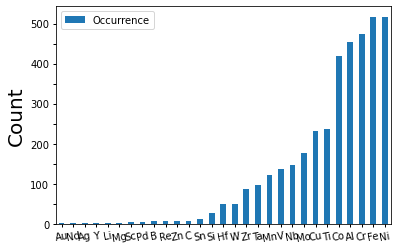

In [11]:
%run common_functions.ipynb
element_occurrence(df,limit_value=8, fig_title='Hardness/ Elongation', fig_name='plots\\hardness\\element_occurrence_before_filter')

## 1.4 Data Filtering

In [12]:
%run common_functions.ipynb
df = data_elimination(df)

Total Datasets 706
Datasets eleminated due to fewer number of element occurance: 14
Datasets eleminated due to number of element in alloy: 9
Total Datasets for the hardness prediction 683


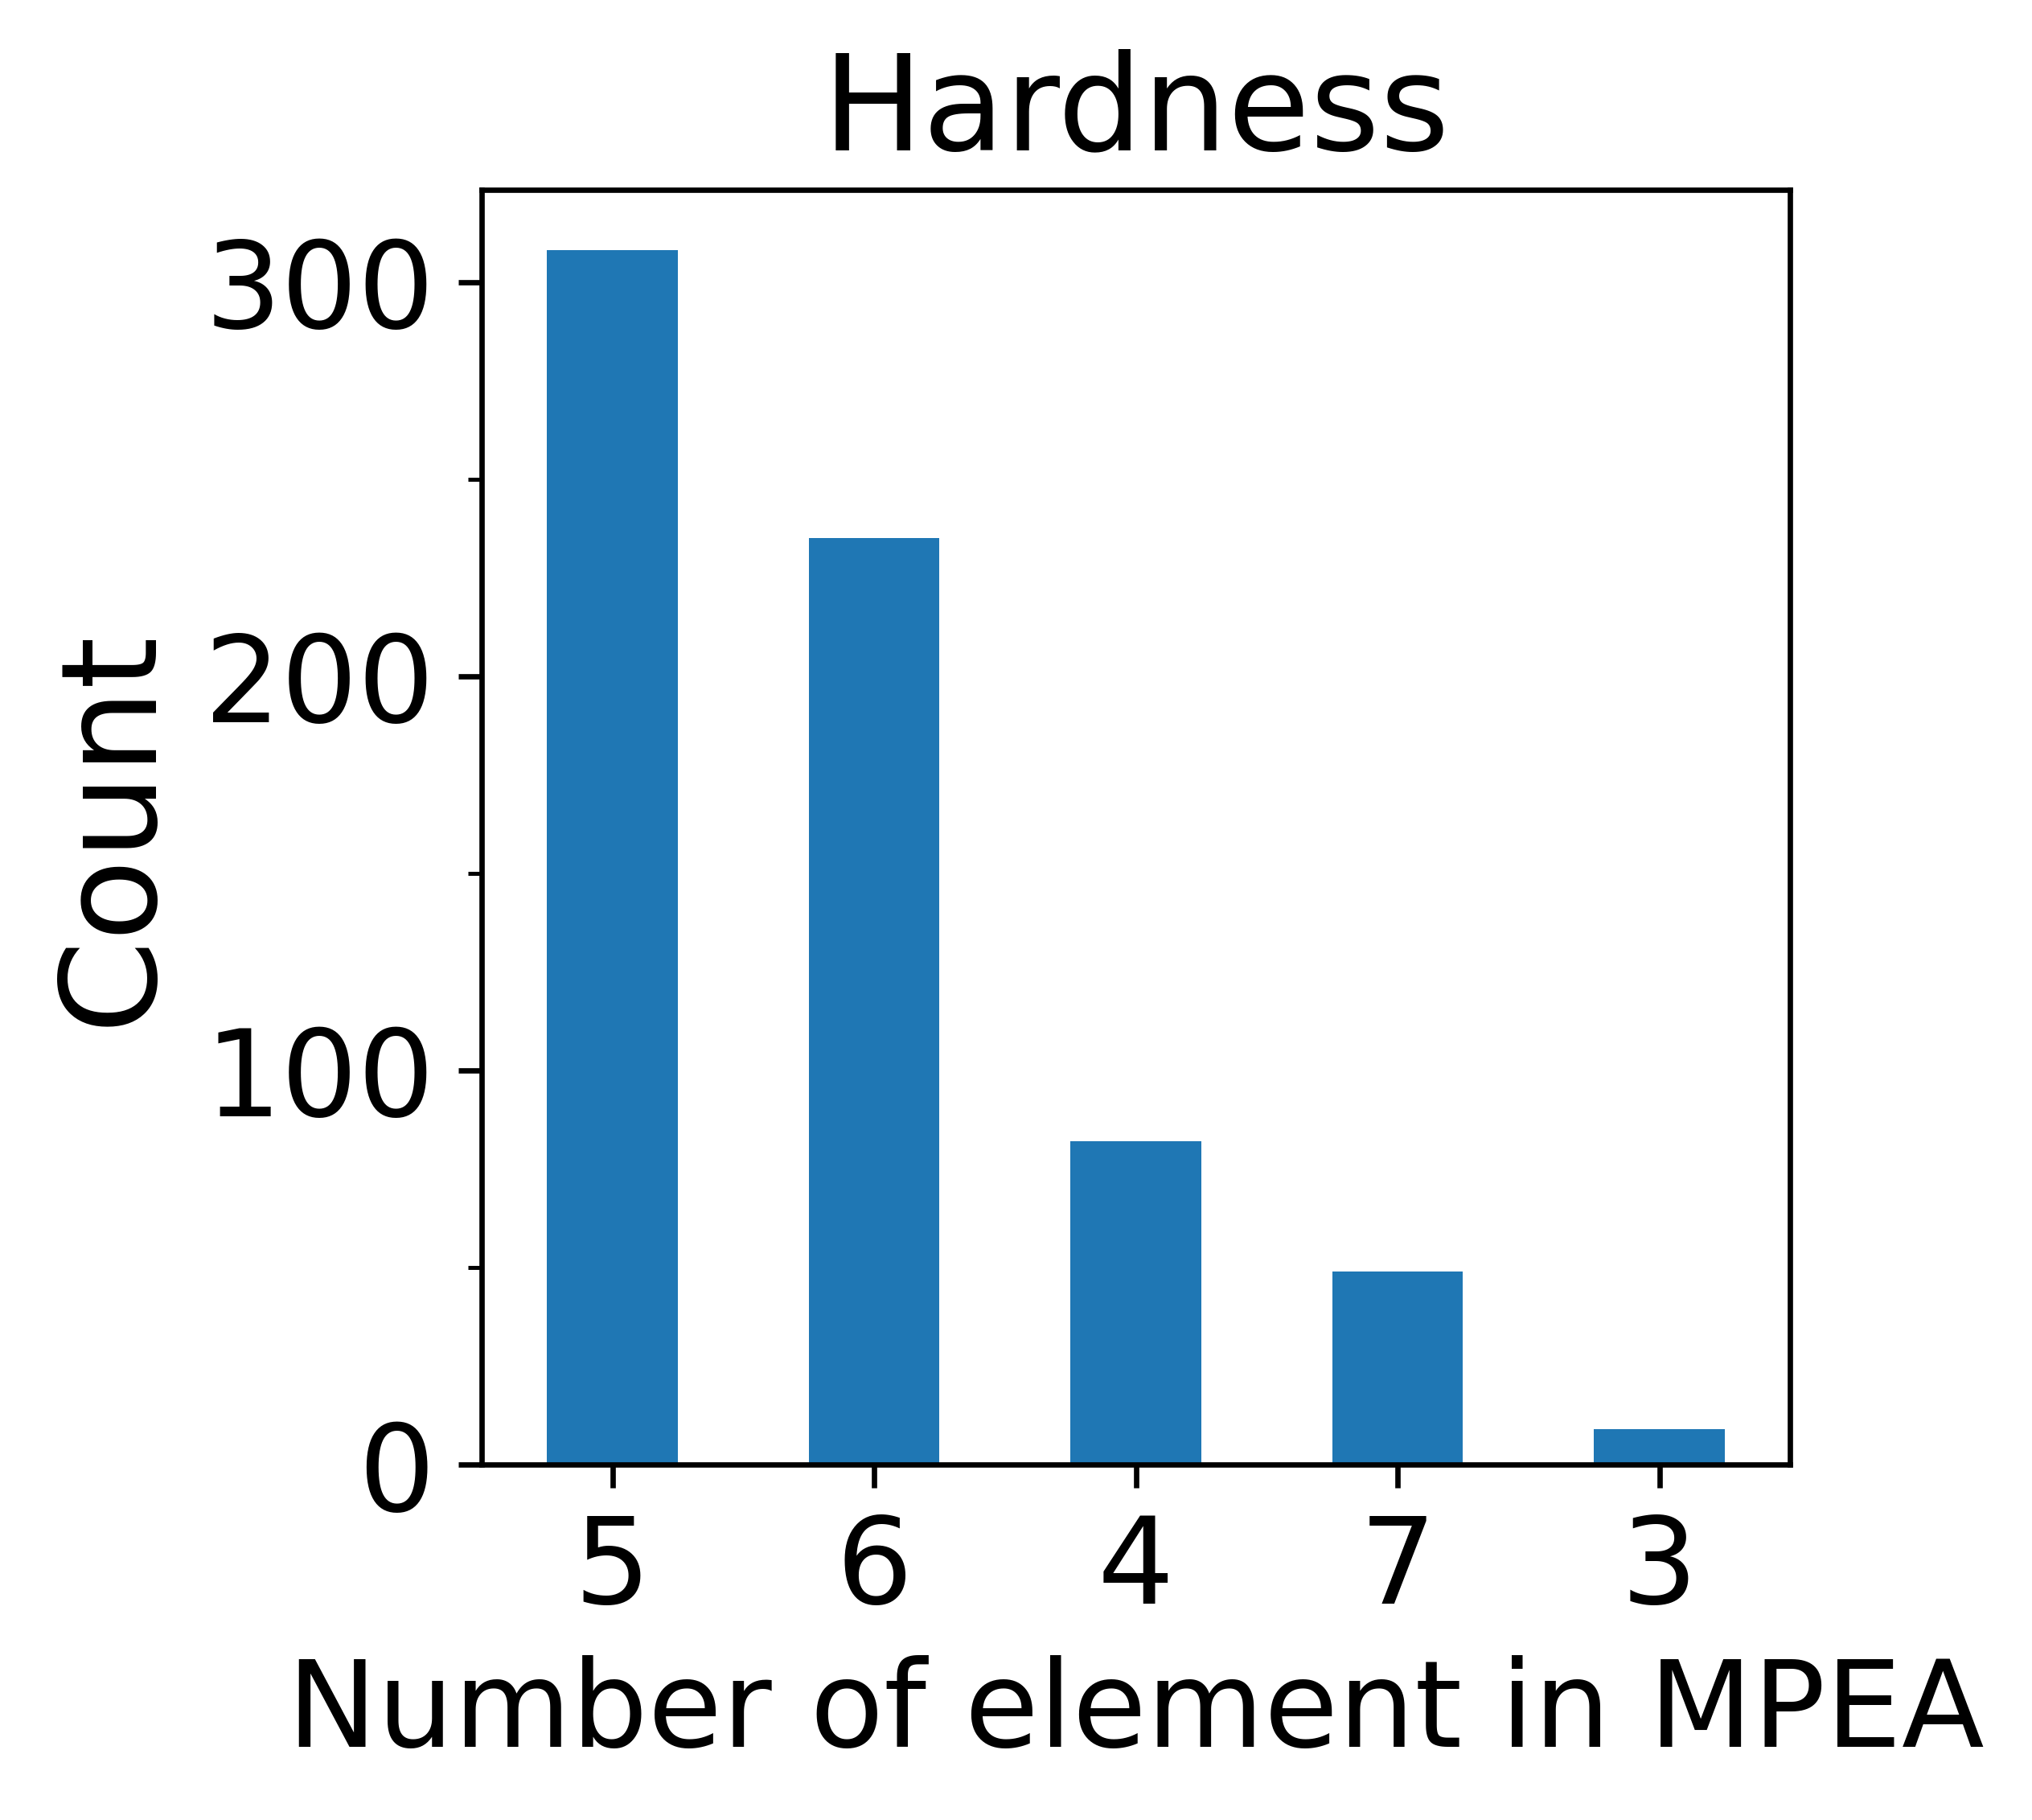

In [13]:
%run common_functions.ipynb
element_number(df, fig_title='Hardness', fig_name='plots\\hardness\\element_number_hardness.png')

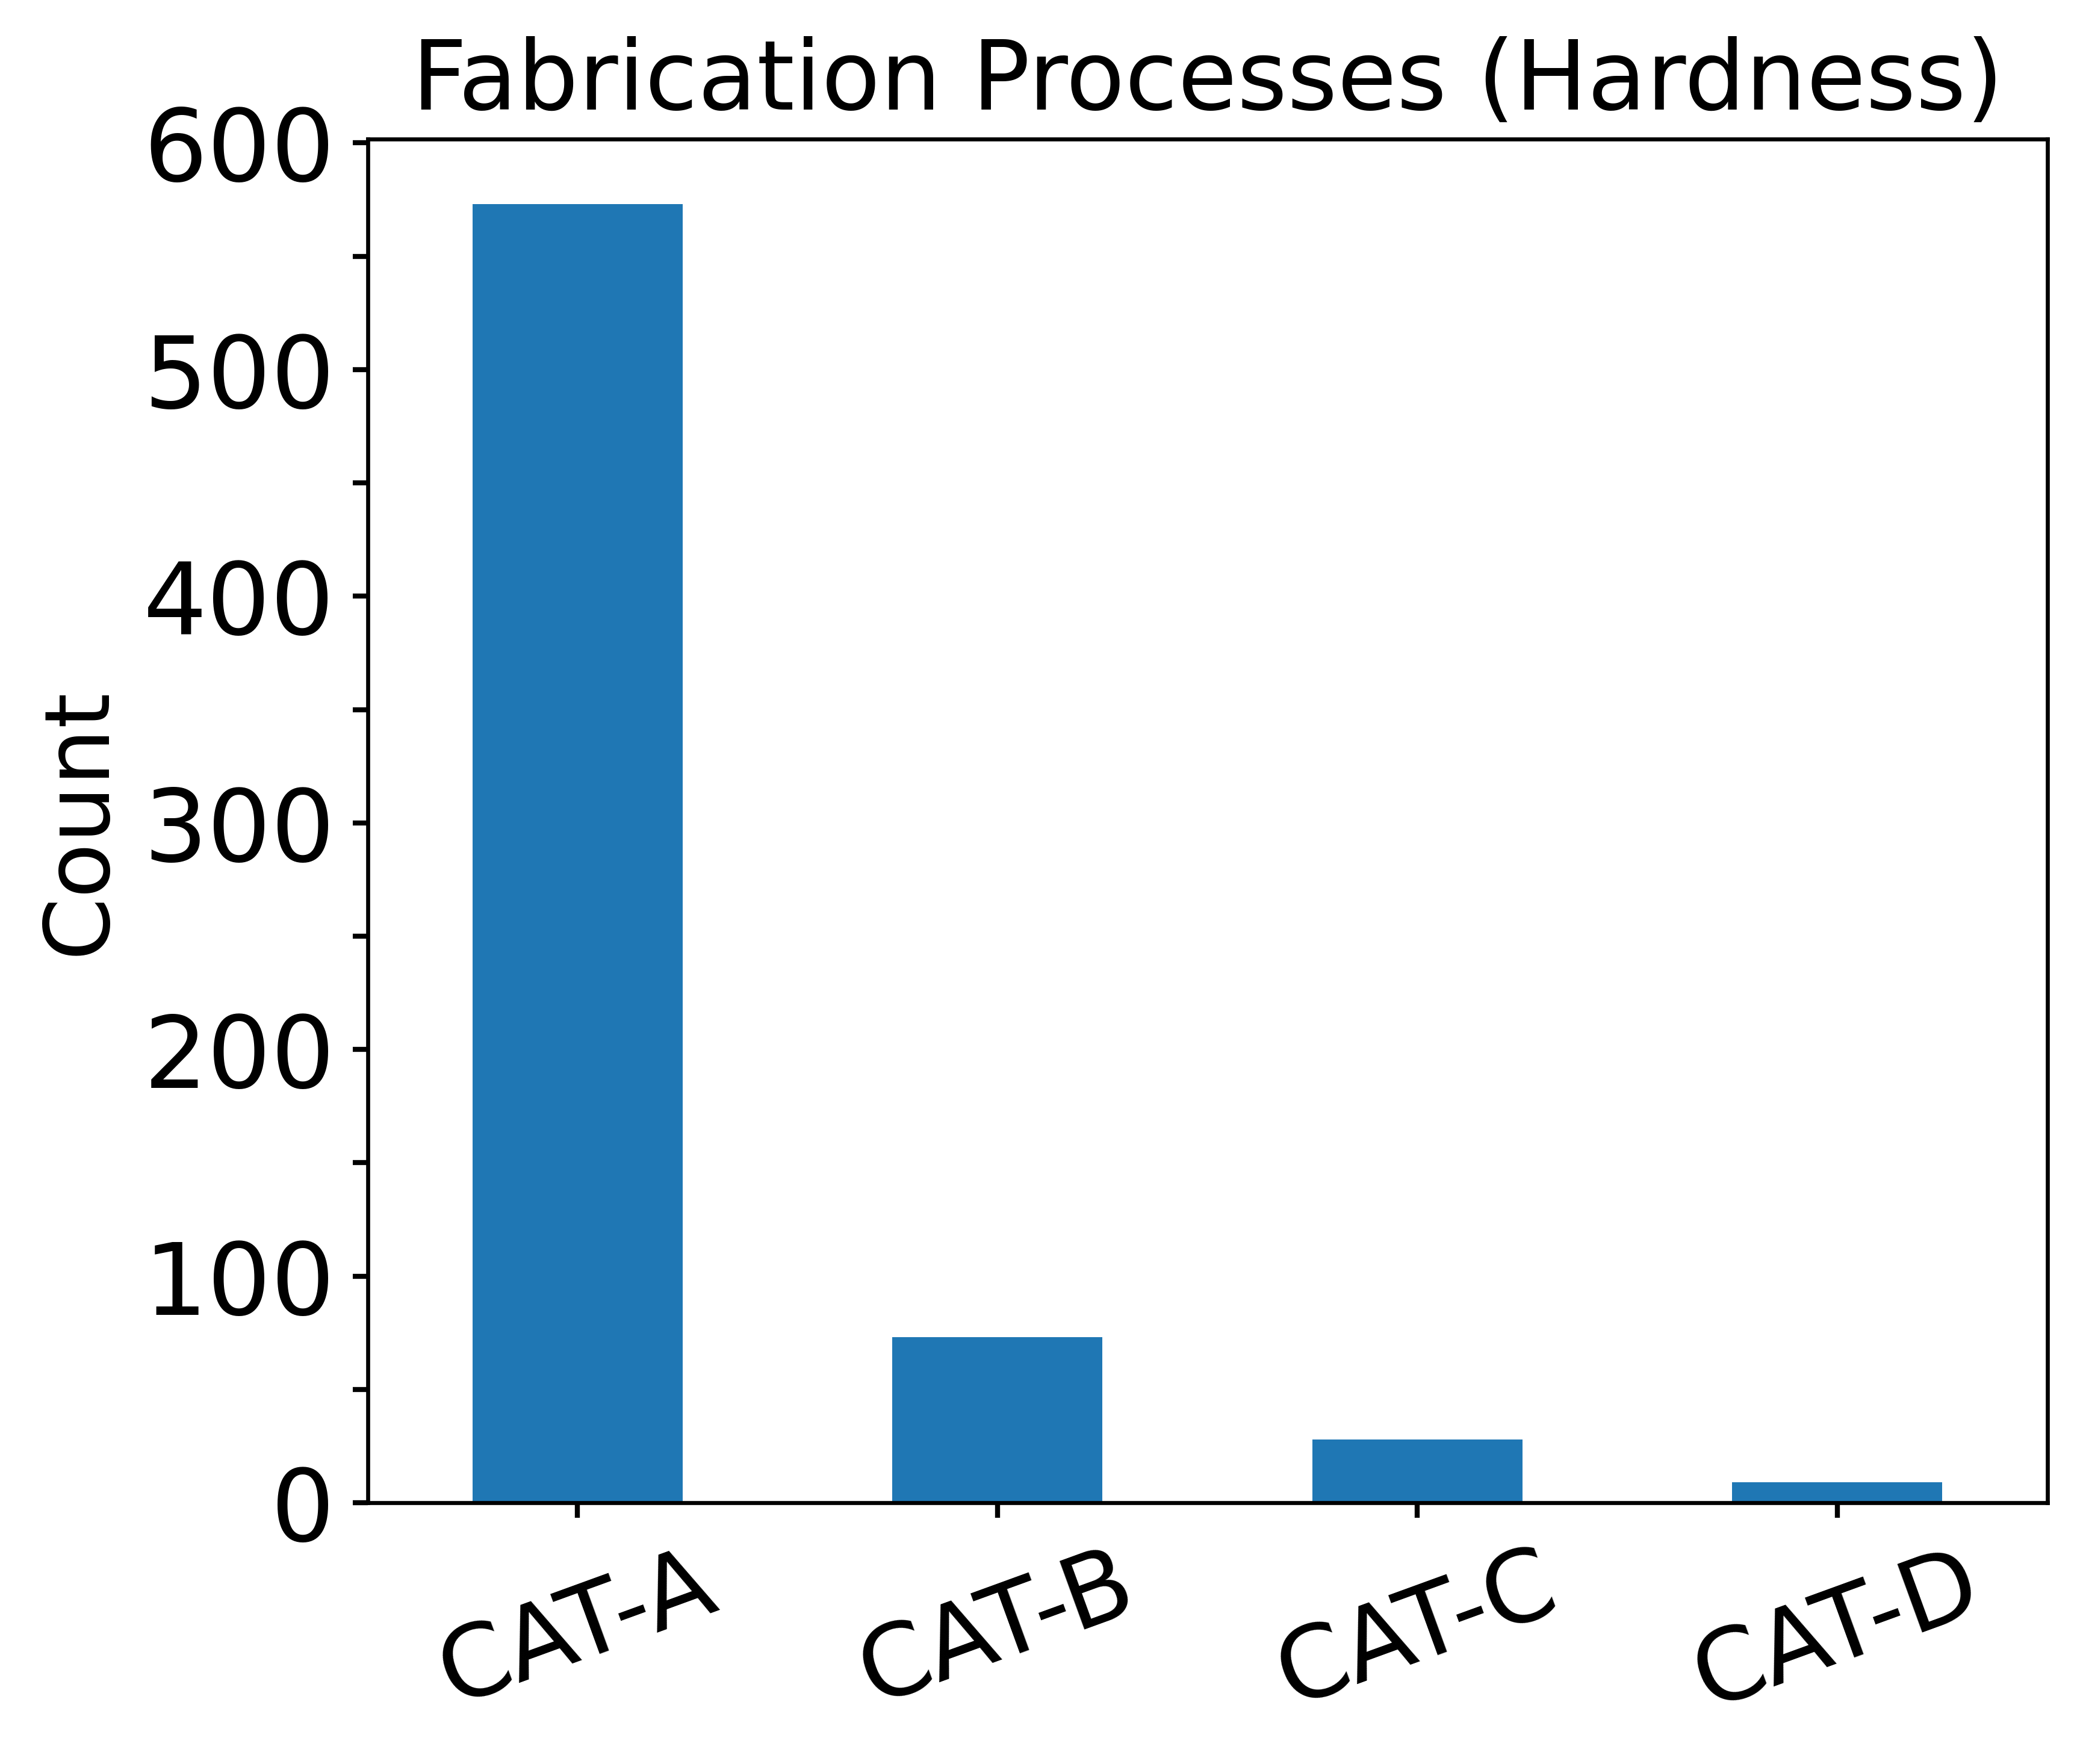

In [14]:
%run common_functions.ipynb
fab_type(df, fig_title='Hardness', fig_name='plots\\hardness\\fab_type_hardness')

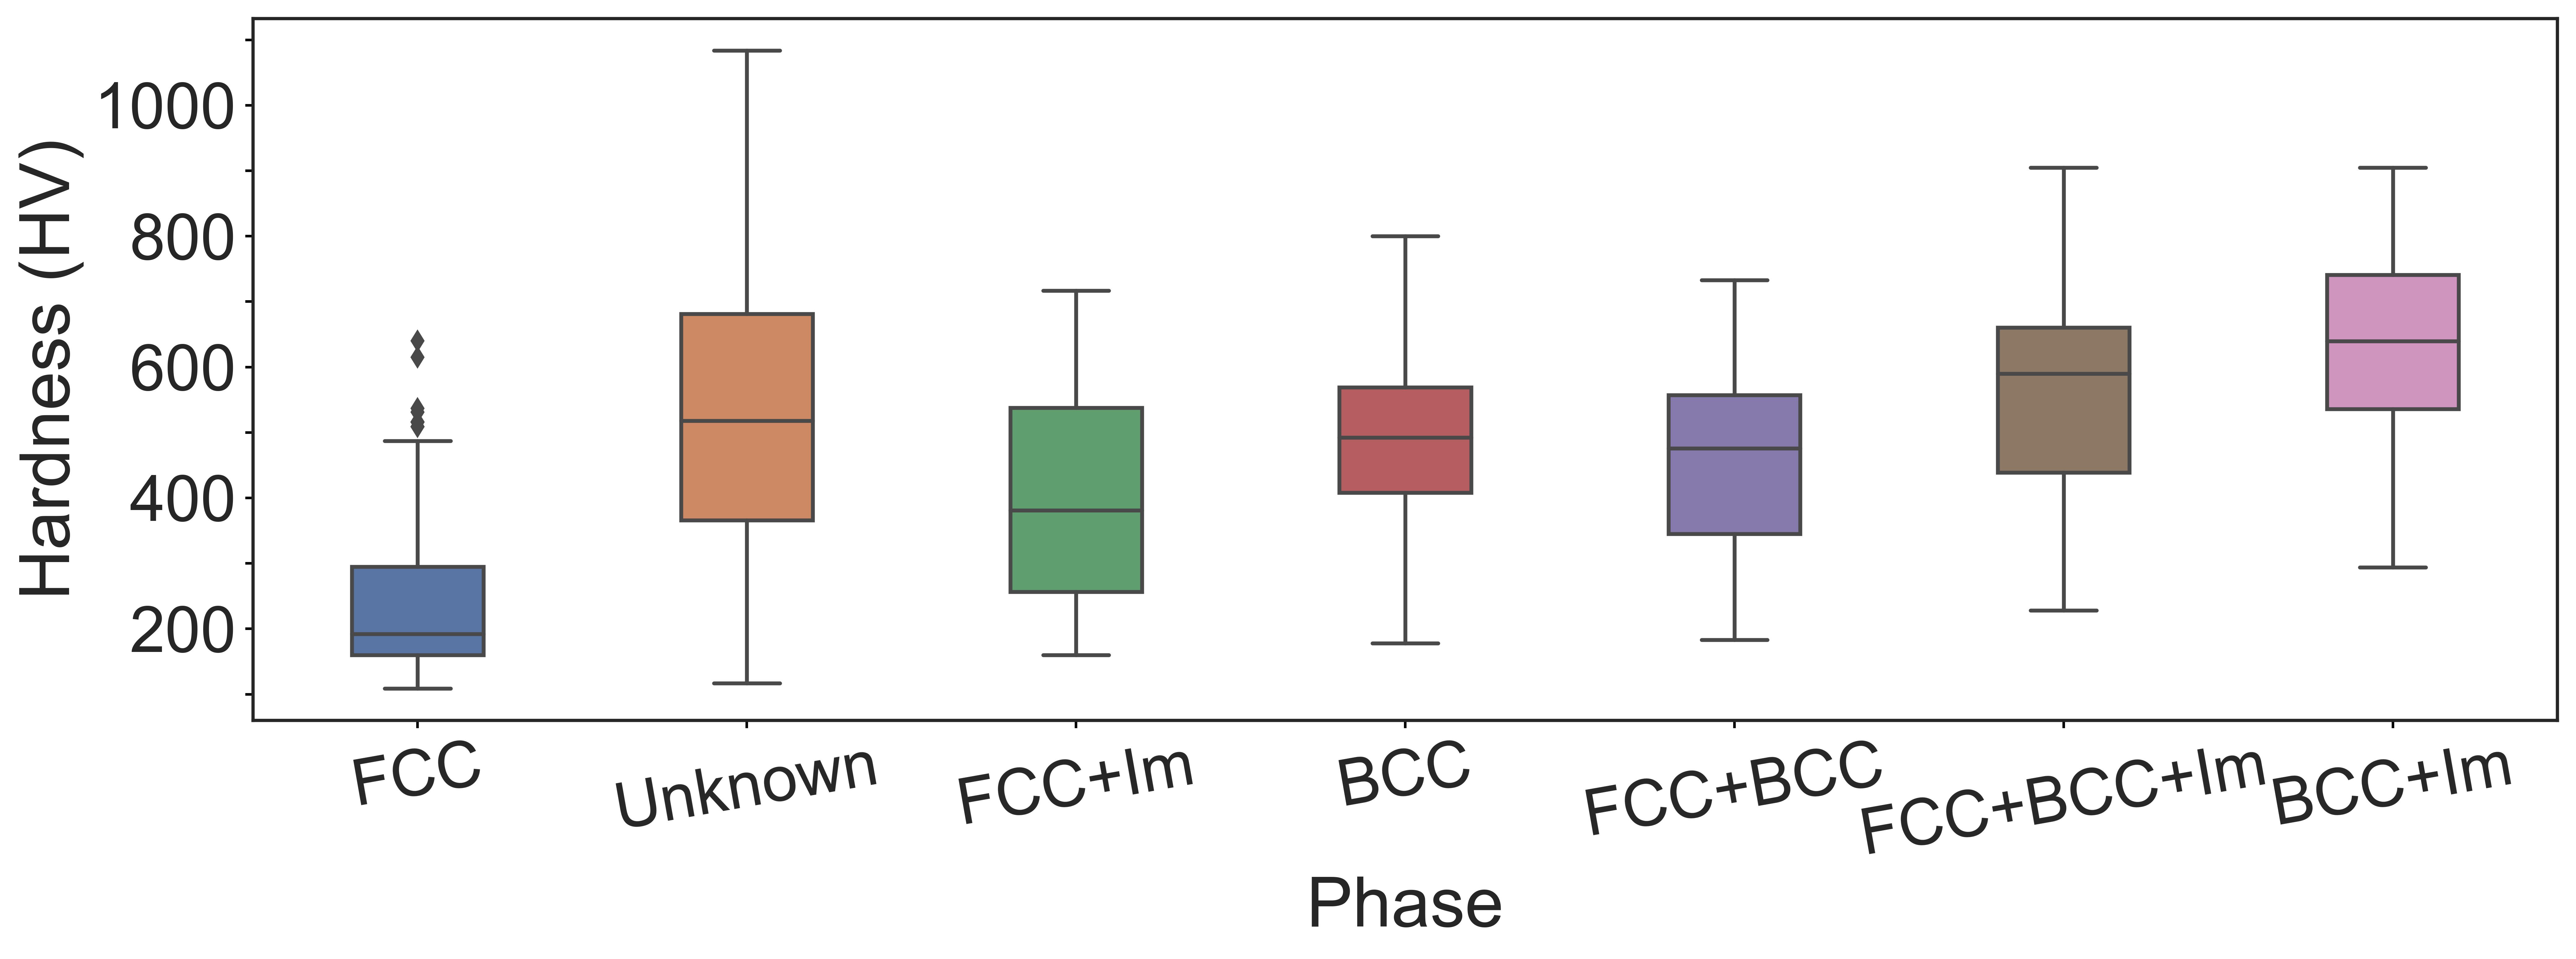

In [15]:
%run common_functions.ipynb
df = phase_rearrange(df)
%run common_functions.ipynb
phase_plot(df, fig_title='Hardness (HV)', fig_name='plots\\hardness\\phase_hardness')

    Occurrence
Sc           1
C            4
Pd           5
B            6
Zn           7
Sn          12
Si          28
W           43
Hf          48
Zr          79
Ta          91
Mn         123
V          127
Nb         140
Mo         167
Ti         223
Cu         225
Co         406
Al         442
Cr         460
Ni         505
Fe         506

 The total number of datasets used for ML model is 683


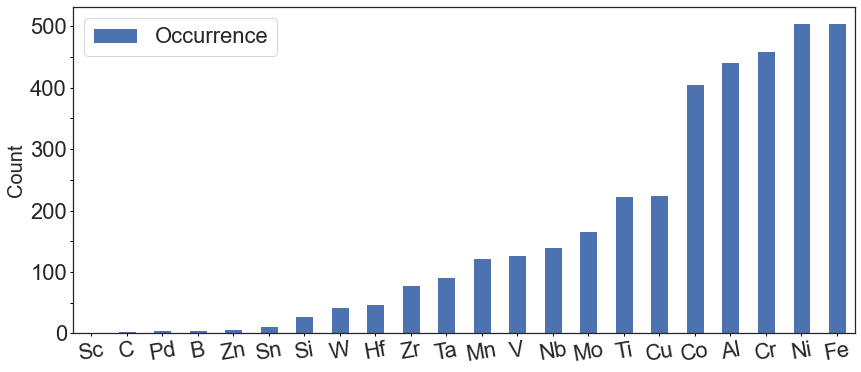

In [16]:
%run common_functions.ipynb
element_occurrence(df,limit_value=8, fig_title='Hardness/ Elongation', fig_name='plots\\hardness\\element_occurrence')

# 2. Input properties calculations

In [17]:

%run common_functions.ipynb
df, df_input_target = properties_calculation(df)

In [18]:
df

Alloys  Hardness (HV)    Phase Fabrication_type  \
0            (CuMnNi)80Zn20          109.0      FCC            CAT-B   
1    Cu26.6Mn26.6Ni26.6Zn20          109.0      FCC            CAT-A   
2              CuMnNiZn0.25          109.0      FCC            CAT-A   
3            Al0.25CoCrFeNi          111.5      FCC            CAT-A   
4             Al0.1CoCrFeNi          117.0  Unknown            CAT-A   
..                      ...            ...      ...              ...   
678     Hf0.5Nb0.5Ta0.5TiZr          376.0  Unknown            CAT-A   
679        Al0.5NbTiV2Zr0.5          622.9   BCC+Im            CAT-A   
680        Al0.5NbTiV2Zr1.5          613.7   BCC+Im            CAT-A   
681        Al0.5Nb0.5TiV2Zr          587.1   BCC+Im            CAT-A   
682     Al0.5Nb0.5TiV2Zr1.5          583.0   BCC+Im            CAT-A   

                                                   DOI  \
0            https://doi.org/10.1016/j.dib.2018.11.111   
1                                       Beniwal: Train   
2    https://www.nature.com/articles/s41597-020-007...   
3                                       Beniwal: Train   
4           https://doi.org/10.1016/j.jmst.2021.01.185   
..                                                 ...   
678                           237688.pdf (chalmers.se)   
679      https://doi.org/10.1016/j.jallcom.2022.166767   
680      https://doi.org/10.1016/j.jallcom.2022.166767   
681      https://doi.org/10.1016/j.jallcom.2022.166767   
682      https://doi.org/10.1016/j.jallcom.2022.166767   

                                                 Paper           composition  \
0    Database on the mechanical properties of high ...      (Cu, Mn, Ni, Zn)   
1                                                  NaN      (Cu, Mn, Ni, Zn)   
2    Expanded dataset of mechanical properties and ...      (Cu, Mn, Ni, Zn)   
3                                                  NaN  (Al, Co, Cr, Fe, Ni)   
4    Machine learning of phases and mechanical prop...  (Al, Co, Cr, Fe, Ni)   
..                                                 ...                   ...   
678                                                NaN  (Hf, Nb, Ta, Ti, Zr)   
679  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
680  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
681  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   
682  Microstructure and mechanical properties of Al...   (Al, Nb, Ti, V, Zr)   

     StrToComposition Exceptions   Li    B    C   Mg        Al   Si   Sc  \
0                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
1                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2                            NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
3                            NaN  0.0  0.0  0.0  0.0  0.058824  0.0  0.0   
4                            NaN  0.0  0.0  0.0  0.0  0.024390  0.0  0.0   
..                           ...  ...  ...  ...  ...       ...  ...  ...   
678                          NaN  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
679                          NaN  0.0  0.0  0.0  0.0  0.100000  0.0  0.0   
680                          NaN  0.0  0.0  0.0  0.0  0.083333  0.0  0.0   
681                          NaN  0.0  0.0  0.0  0.0  0.100000  0.0  0.0   
682                          NaN  0.0  0.0  0.0  0.0  0.090909  0.0  0.0   

           Ti         V        Cr        Mn        Fe        Co        Ni  \
0    0.000000  0.000000  0.000000  0.307692  0.000000  0.000000  0.307692   
1    0.000000  0.000000  0.000000  0.266533  0.000000  0.000000  0.266533   
2    0.000000  0.000000  0.000000  0.307692  0.000000  0.000000  0.307692   
3    0.000000  0.000000  0.235294  0.000000  0.235294  0.235294  0.235294   
4    0.000000  0.000000  0.243902  0.000000  0.243902  0.243902  0.243902   
..        ...       ...       ...       ...       ...       ...       ...   
678  0.285714  0.000000  0.000000  0.000000  0

In [19]:
df_input_target

No of Components  $\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC  \
0                   4  0.046524   0.1649  267.534101  1470.135385  9.538462   
1                   4  0.048130   0.1594  363.371074  1366.137094  9.867735   
2                   4  0.046524   0.1649  267.534101  1470.135385  9.538462   
3                   5  0.070652   0.1060  281.710106  1816.557059  7.941176   
4                   5  0.055595   0.1009  229.541666  1848.865122  8.121951   
..                ...       ...      ...         ...          ...       ...   
678                 5  0.065872   0.1149  461.866356  2383.428571  4.285714   
679                 5  0.131479   0.0878  477.662566  2117.547000  4.500000   
680                 5  0.132444   0.1212  436.061672  2119.289167  4.416667   
681                 5  0.135894   0.1134  429.306340  2055.347000  4.400000   
682                 5  0.136181   0.1248  409.860058  2061.951818  4.363636   

            AN           K           B        ΔB          G        ΔG  \
0    27.538462  162.707692  140.769231  0.223710  54.923077  0.257993   
1    27.867735  156.994790  131.302605  0.288945  53.328156  0.258746   
2    27.538462  162.707692  140.769231  0.223710  54.923077  0.257993   
3    25.470588   99.705882  166.823529  0.144396  83.411765  0.256769   
4    25.926829   94.756098  170.146341  0.099855  85.512195  0.218933   
..         ...         ...         ...       ...        ...       ...   
678  44.285714   32.000000  115.302857  0.438251  41.571429  0.295692   
679  27.100000   53.400000  132.956000  0.303395  41.100000  0.166609   
680  29.250000   48.333333  119.723333  0.394565  39.750000  0.174635   
681  27.000000   50.300000  121.312000  0.367238  40.600000  0.178023   
682  28.181818   47.818182  115.152727  0.405807  39.909091  0.181147   

       ΔSmix  $\lambda$    ΔHmix    $\Omega$  Hardness (HV)  
0    10.6859  4936.9749  -3.6447   4310.3182          109.0  
1    11.4684  4950.7965  -7.6728   2041.9321          109.0  
2    10.6859  4936.9749  -3.6447   4310.3182          109.0  
3    12.7077  2545.7557  -9.0166   2560.1782          111.5  
4    12.1979  3946.5165  -5.9975   3760.2372          117.0  
..       ...        ...      ...         ...            ...  
678  12.8853  2969.5890   2.1162  14512.6241          376.0  
679  12.2283   707.3842 -12.9978   1992.1836          622.9  
680  12.6132   719.0589 -12.5014   2138.2429          613.7  
681  12.2283   662.1669 -14.6125   1719.9957          587.1  
682  12.2061   658.1825 -14.2753   1763.0782          583.0  

[683 rows x 17 columns]

In [20]:
df_input_target.describe()

No of Components    $\delta$     Δ$\chi$         ΔTm        Tm(K)  \
count        683.000000  683.000000  683.000000  683.000000   683.000000   
mean           5.341142    0.100401    0.151986  408.509790  1864.915679   
std            0.829721    0.036560    0.058809  136.758675   358.297571   
min            3.000000    0.018823    0.031400   33.891985  1324.362500   
25%            5.000000    0.074405    0.120600  321.696688  1624.970807   
50%            5.000000    0.097951    0.134300  400.643931  1777.321930   
75%            6.000000    0.128602    0.163450  490.009232  1991.460750   
max            7.000000    0.233189    0.365800  990.165445  3177.121000   

              VEC          AN           K           B          ΔB           G  \
count  683.000000  683.000000  683.000000  683.000000  683.000000  683.000000   
mean     6.852897   27.971081  114.970197  152.397221    0.255057   64.893510   
std      1.342282    7.412113   42.852053   20.219832    0.094042   12.956274   
min      3.750000   19.333333   21.000000   82.640000    0.026683   30.000000   
25%      5.790000   24.103556   84.891304  140.309524    0.187225   58.746758   
50%      7.200000   25.428571  111.800000  152.271186    0.254090   67.090909   
75%      7.818182   29.005155  154.232441  161.952381    0.319934   73.062479   
max     10.000000   58.073000  243.638000  230.900000    0.544261   98.000000   

               ΔG       ΔSmix     $\lambda$       ΔHmix       $\Omega$  \
count  683.000000  683.000000    683.000000  683.000000     683.000000   
mean     0.392020   13.244270   2220.420363  -12.621281    8456.505869   
std      0.131729    1.458035   2819.837803    8.546605   36513.151351   
min      0.039801    9.133900    200.621200  -41.225800     445.254600   
25%      0.297436   12.424550    828.954750  -18.876300    1262.501900   
50%      0.376363   13.308100   1390.642600  -11.834300    2000.741300   
75%      0.462242   14.435500   2362.954900   -6.156050    4146.052600   
max      0.940949   16.178300  28016.738000    7.599600  562776.198900   

       Hardness (HV)  
count     683.000000  
mean      495.325769  
std       196.746061  
min       109.000000  
25%       349.900000  
50%       500.000000  
75%       628.500000  
max      1084.000000

## 2.1 One-hot encoding of fabrication processes

In [19]:
%run common_functions.ipynb
df_fab, enc = fab_encoding(df,path='hardness_model_files\\')

import pickle
pickle.dump(enc, open('hardness_model_files\\fab_encoding.pkl','wb'))

CAT-A    573
CAT-B     73
CAT-C     28
CAT-D      9
Name: Fabrication_type, dtype: int64


In [20]:
fab_encoding(df)

CAT-A    573
CAT-B     73
CAT-C     28
CAT-D      9
Name: Fabrication_type, dtype: int64


(       0    1    2    3
 0    0.0  1.0  0.0  0.0
 1    1.0  0.0  0.0  0.0
 2    1.0  0.0  0.0  0.0
 3    1.0  0.0  0.0  0.0
 4    1.0  0.0  0.0  0.0
 ..   ...  ...  ...  ...
 678  1.0  0.0  0.0  0.0
 679  1.0  0.0  0.0  0.0
 680  1.0  0.0  0.0  0.0
 681  1.0  0.0  0.0  0.0
 682  1.0  0.0  0.0  0.0
 
 [683 rows x 4 columns],
 OneHotEncoder())

# 3. Train-Test split

In [21]:
%run common_functions.ipynb
input_name = ['$\delta$', 'Δ$\chi$', 'ΔTm','Tm(K)', 'VEC', 'AN', 'K','B', 'ΔB','G', 'ΔG','ΔSmix','$\lambda$', 'ΔHmix','$\Omega$']


X_train_no_fab, X_train_fab, X_test_no_fab, X_test_fab,y_train, y_test,n_component = train_test_split(df_input_target, df_fab, input_name)

Train 
 Mean:  499.53778501628676 
 Median:  506.0 
 10 Percentile: 207.3 
 90 Percentile: 782.7
Number of  Train 614
----------------------
Test 
 Mean:  457.84492753623186 
 Median:  485.0 
 10 Percentile: 218.4 
 90 Percentile: 715.98
Number of  Test 69
----------------------


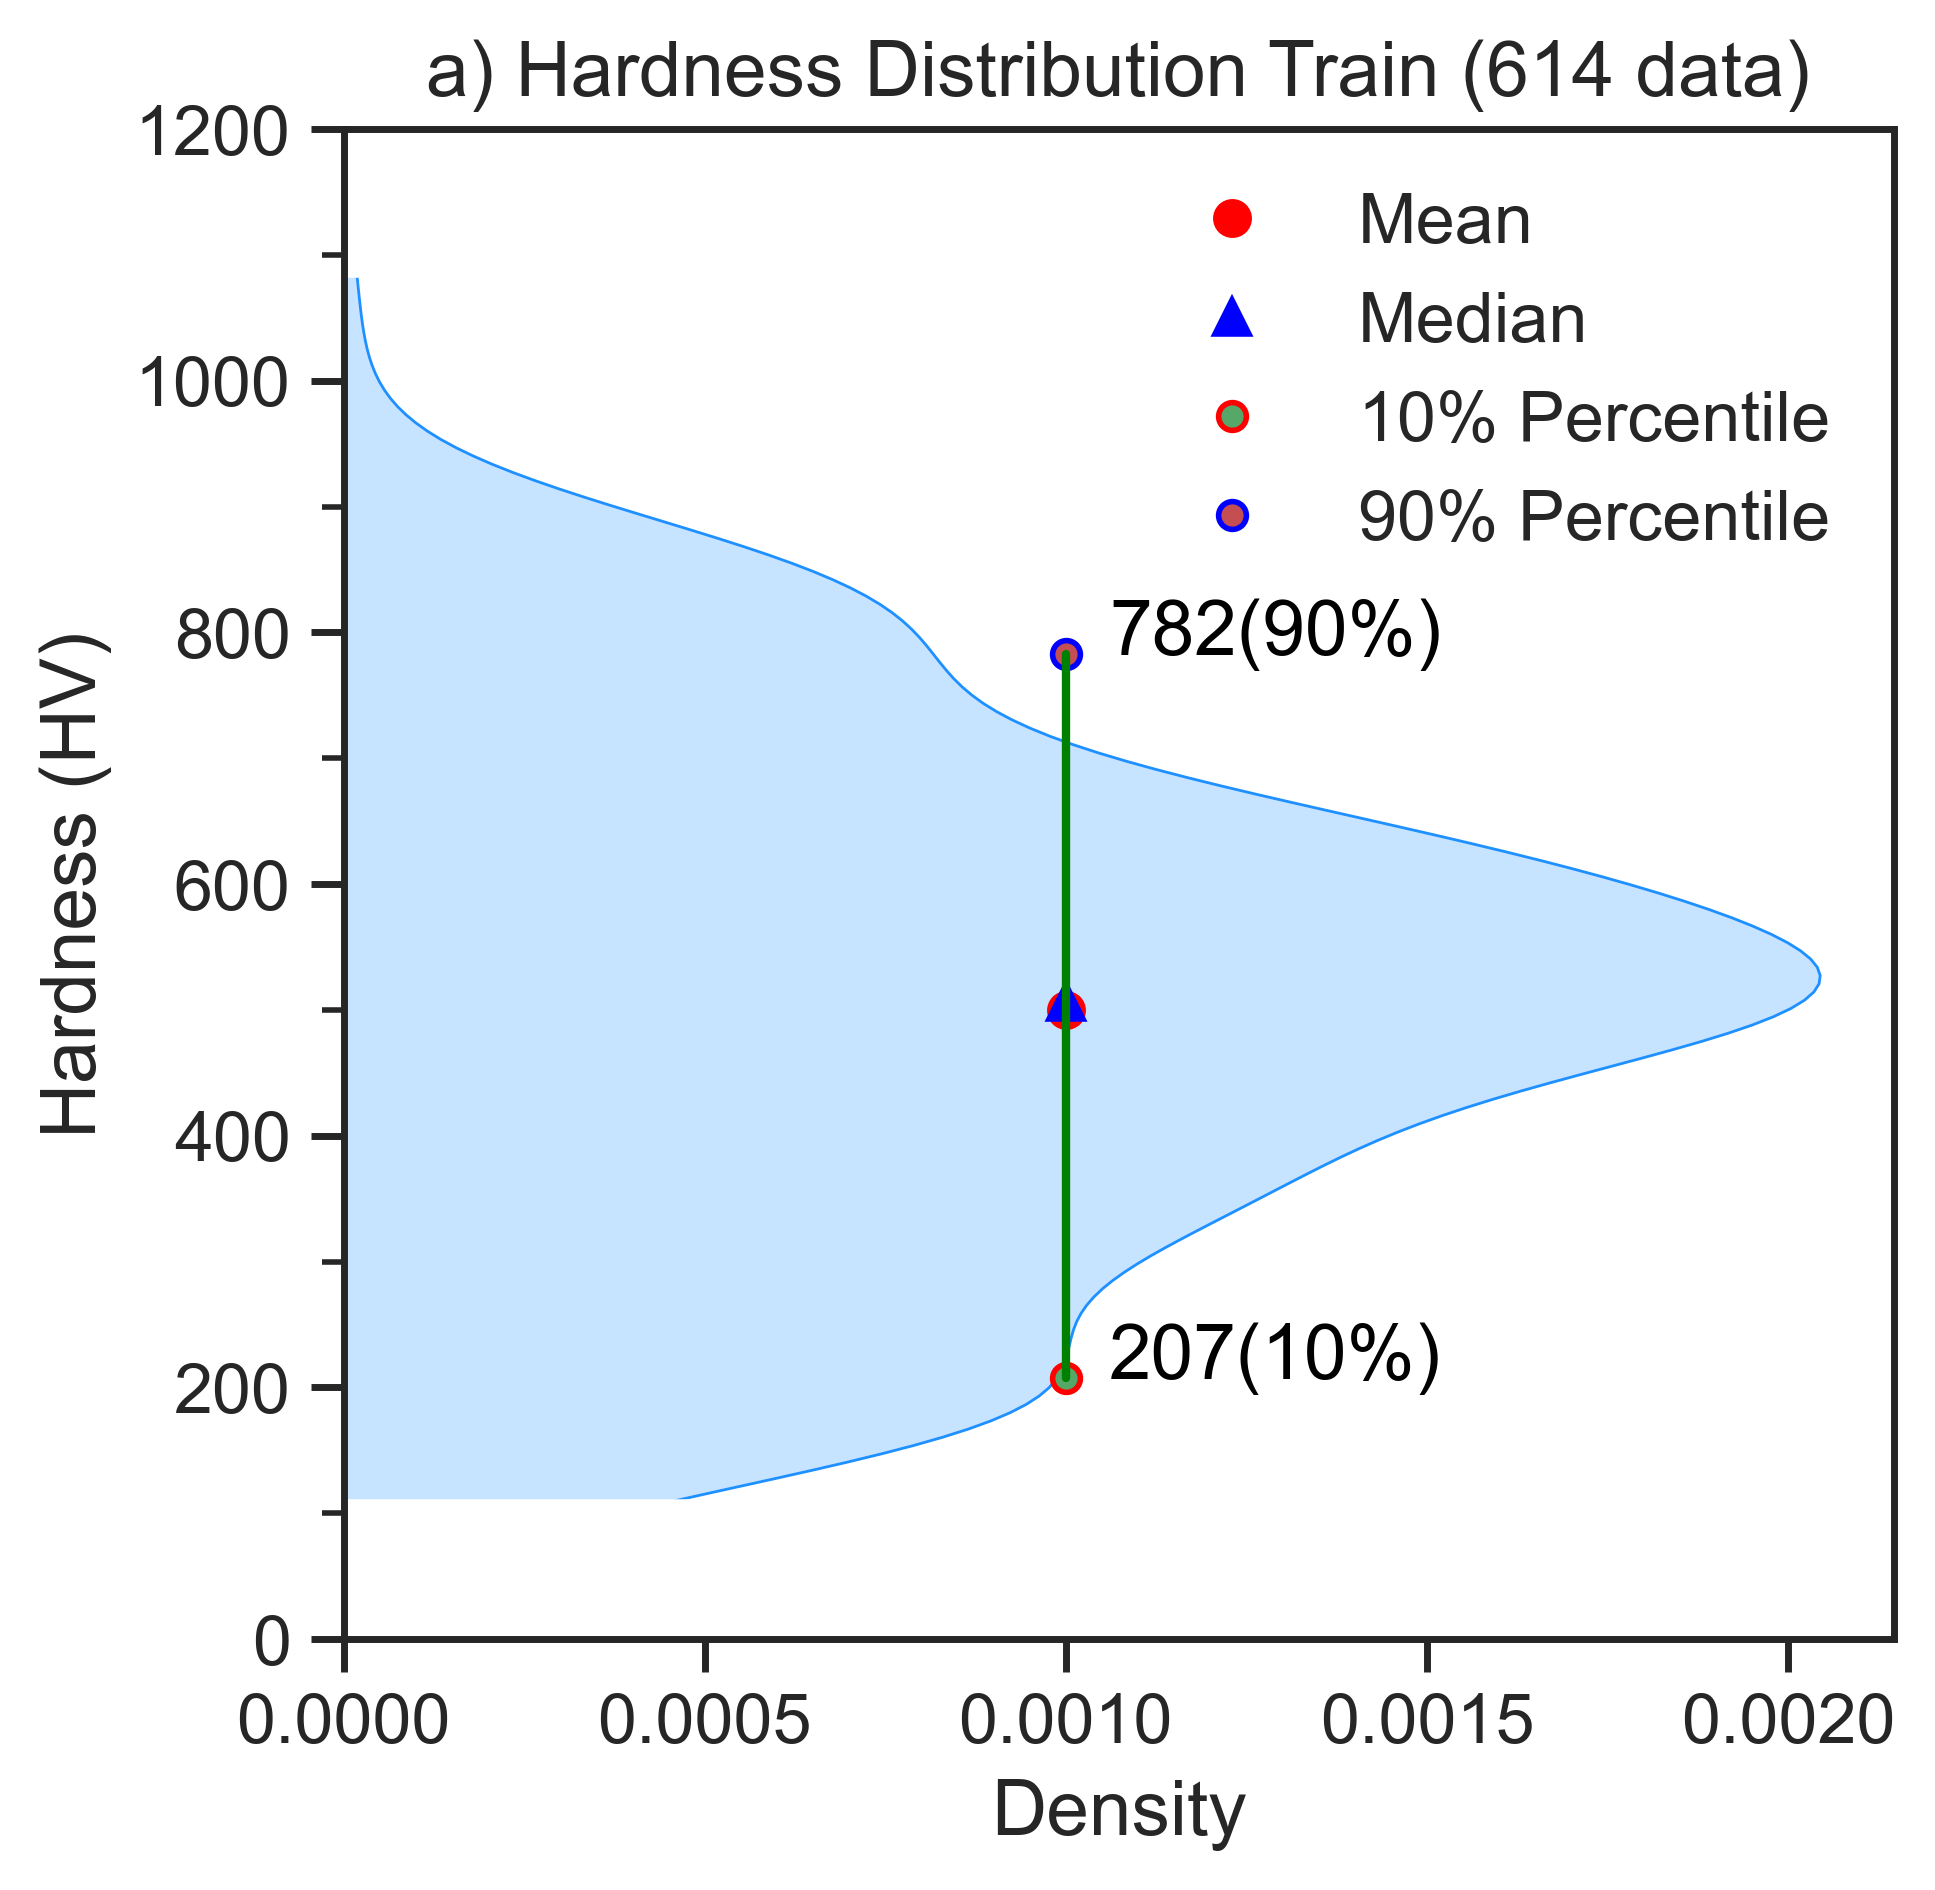

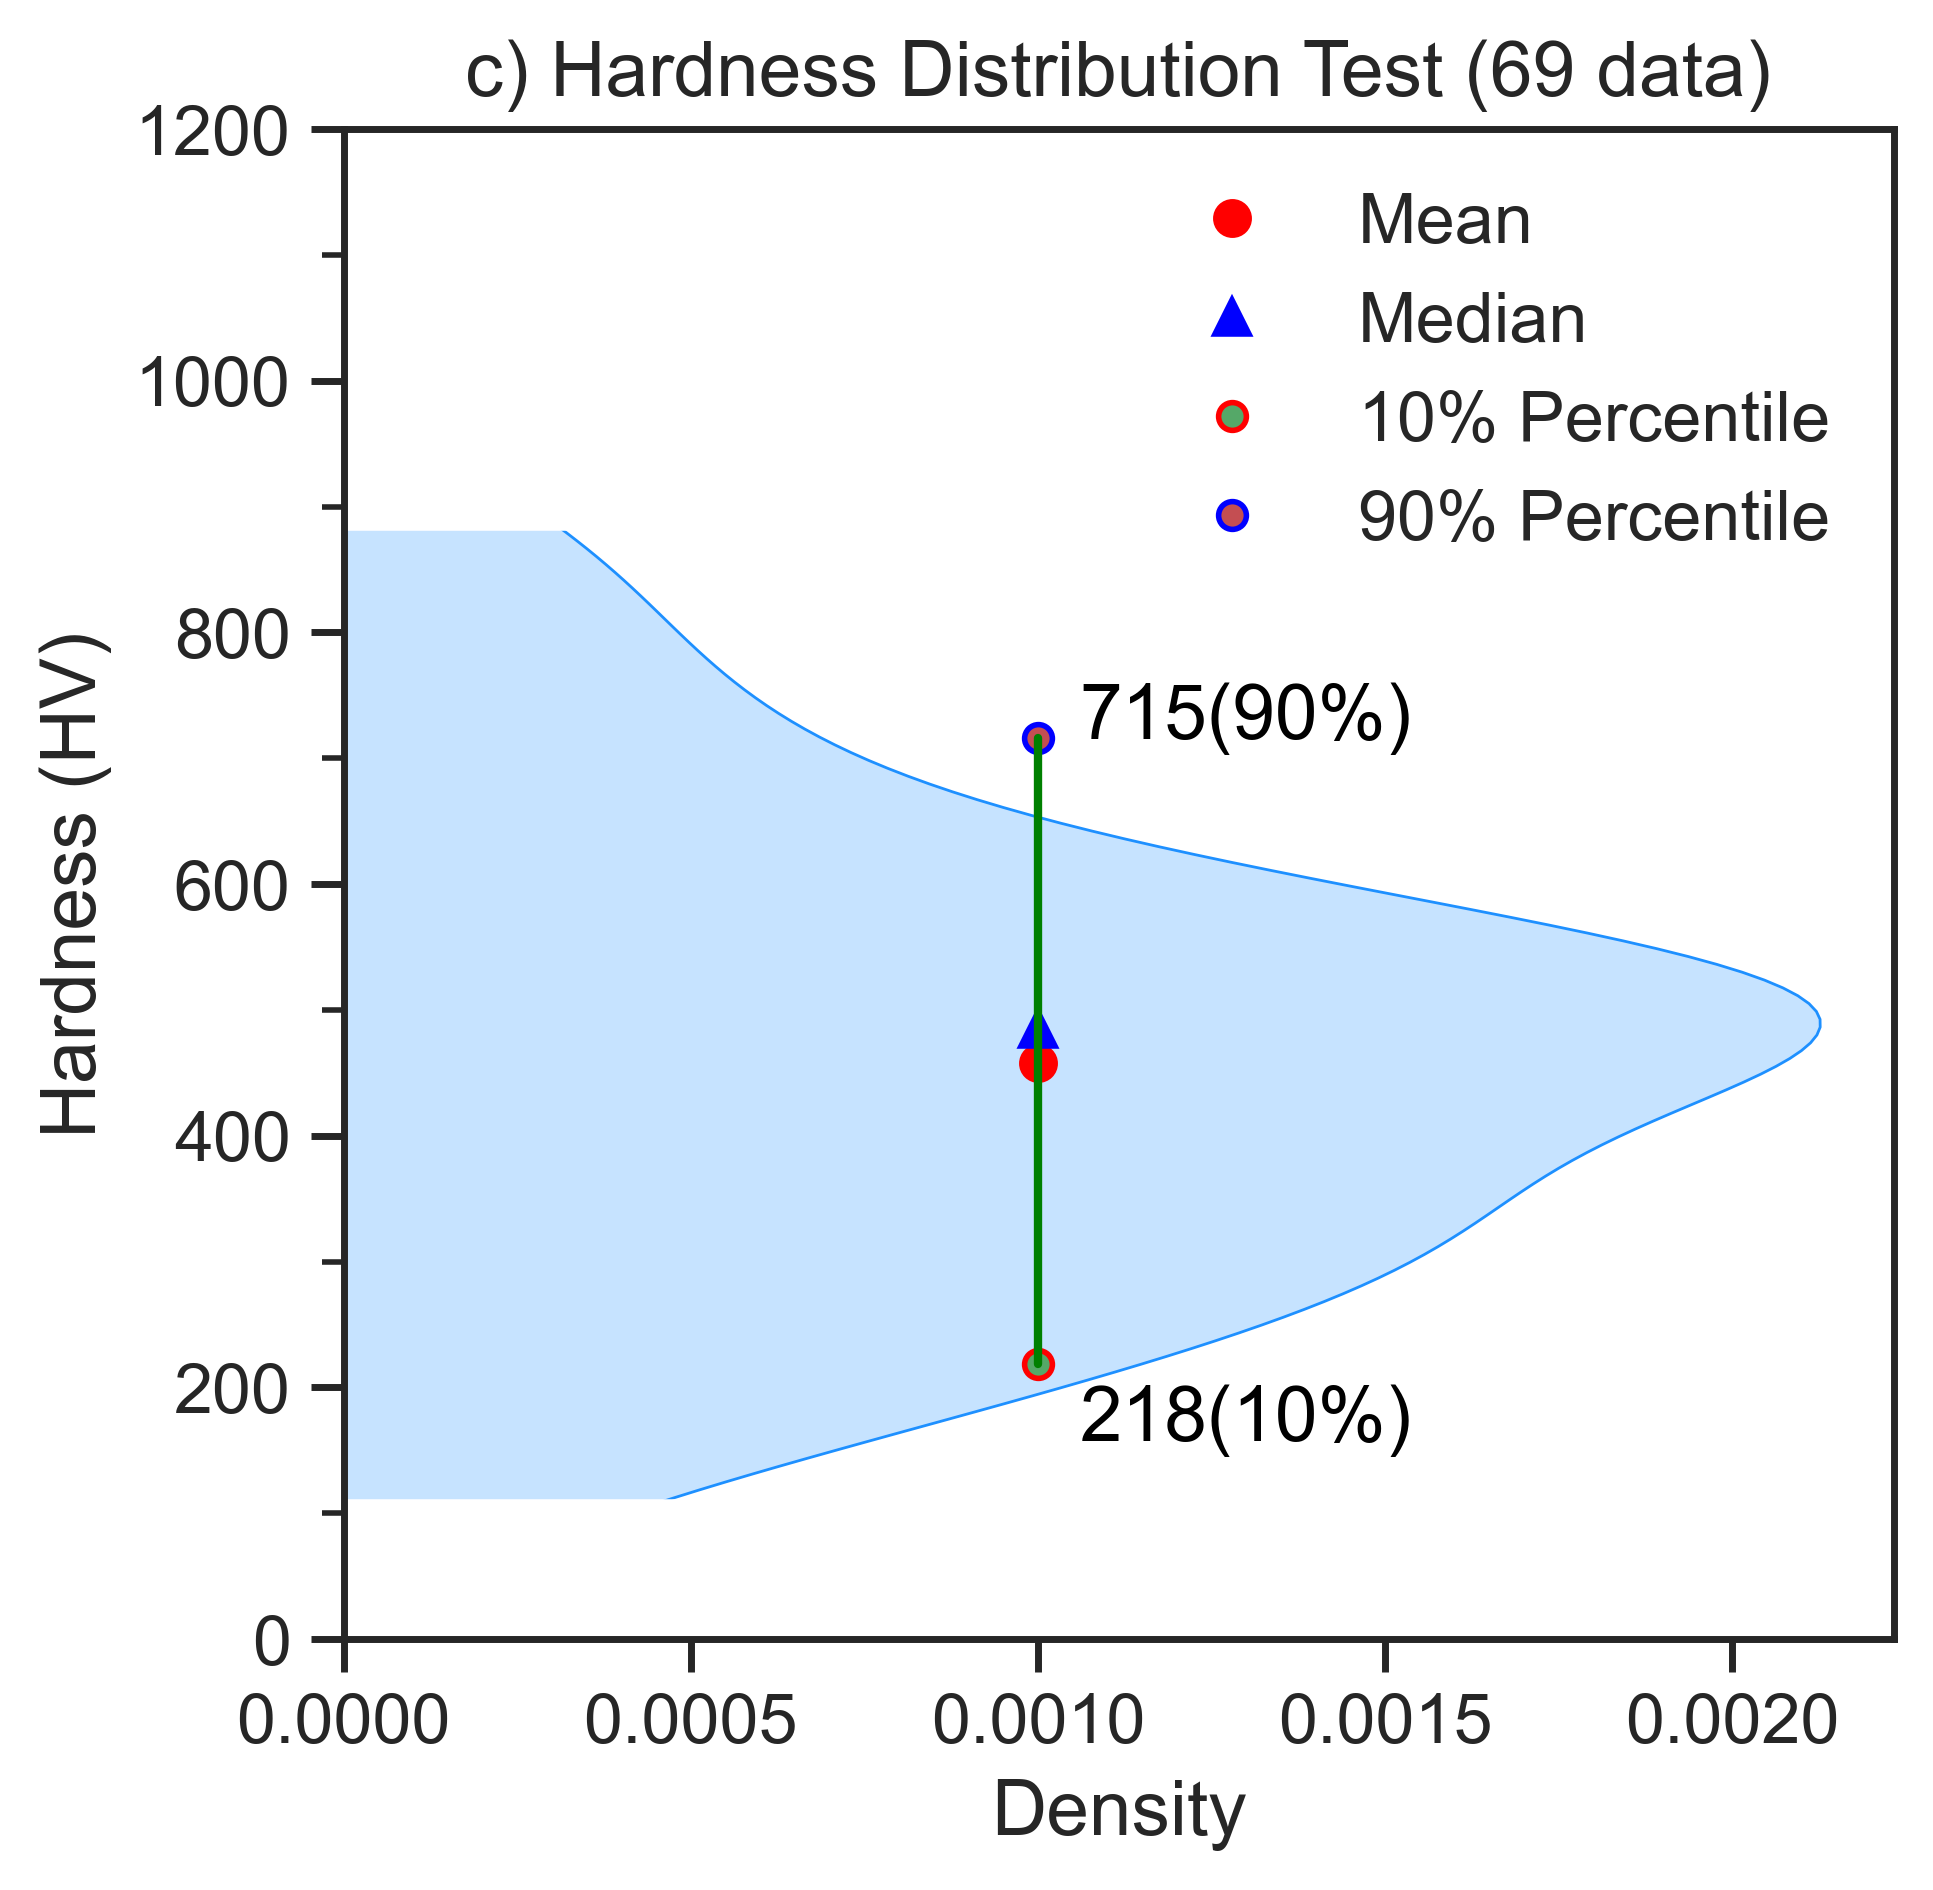

In [22]:
%run common_functions.ipynb

data_distribution(y_train,"Train",test_annotate=0, ylabel = 'Hardness (HV)', title="a) Hardness Distribution ",plot_path="plots\\hardness\\")
data_distribution(y_test,"Test",test_annotate=60, ylabel = 'Hardness (HV)', title="c) Hardness Distribution ",plot_path="plots\\hardness\\")

In [23]:
X_train_no_fab

$\delta$  Δ$\chi$         ΔTm        Tm(K)       VEC         AN  \
81   0.090540   0.1161  380.610688  1676.334444  8.111111  25.222222   
412  0.147198   0.0442  515.143970  1809.367500  4.500000  20.500000   
289  0.140861   0.2497  748.917421  2363.061304  4.739130  36.478261   
76   0.050781   0.1387  241.251877  1785.857033  7.911591  25.770138   
174  0.117549   0.1409  415.370790  1698.652308  6.923077  23.692308   
..        ...      ...         ...          ...       ...        ...   
71   0.074422   0.1068  235.012529  2191.666667  4.000000  44.666667   
106  0.051893   0.1387  243.947098  1784.185686  7.901961  25.745098   
270  0.148963   0.1787  327.184710  2245.727273  4.363636  37.272727   
435  0.089104   0.1228  366.477942  1792.452724  7.608484  25.028821   
102  0.085800   0.1188  343.008917  1701.702632  8.122807  25.421053   

              K           B        ΔB          G        ΔG    ΔSmix  \
81   173.888889  152.888889  0.199832  74.222222  0.379844  13.1452   
412   95.500000  126.500000  0.281355  58.000000  0.584048  11.5257   
289   84.782609  162.086957  0.330661  42.521739  0.409445  13.2416   
76    77.396857  160.479371  0.154619  77.424361  0.303618  13.8832   
174  149.076923  140.923077  0.250350  69.000000  0.451446  14.7842   
..          ...         ...       ...        ...       ...      ...   
71    22.666667   91.186667  0.291776  35.666667  0.168743   9.1339   
106   77.705882  160.313725  0.156374  77.323529  0.305138  13.9209   
270   41.454545  118.829091  0.338653  38.886364  0.161979  14.6972   
435  134.180028  158.261011  0.166773  68.809823  0.367519  15.9085   
102  155.596491  156.140351  0.194241  73.298246  0.350175  15.4453   

     $\lambda$    ΔHmix     $\Omega$  
81   1603.5577  -4.6194    4770.3109  
412   531.9421 -24.7050     844.1262  
289   667.3575 -14.8529    2106.7120  
76   5383.7375  -5.8095    4267.7352  
174  1069.9433 -17.5511    1430.8658  
..         ...      ...          ...  
71   1649.1170  -0.1213  164986.6659  
106  5169.4943  -5.9906    4146.0526  
270   662.3381 -14.5082    2274.9832  
435  2003.7131  -8.8971    3204.9936  
102  2098.0571  -7.3782    3562.2890  

[614 rows x 15 columns]

# 4. Data Standarization

In [24]:
%run common_functions.ipynb
scaler, std_df = std_data(X_train_no_fab)

import pickle
pickle.dump(scaler, open(path+'scaler.pkl','wb'))

# 5. Feature Selections

## 5.1 PCC Heatmap

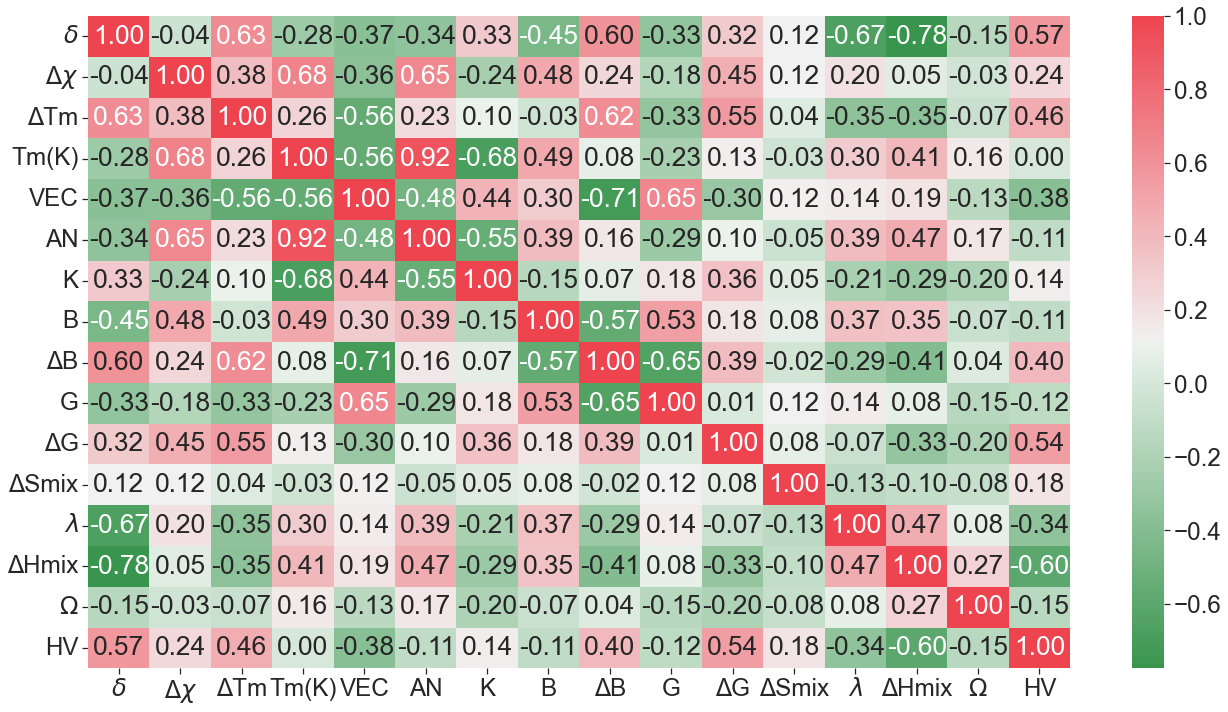

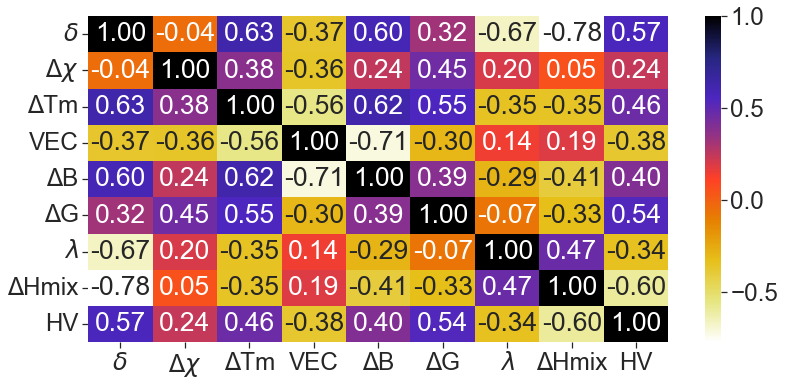

In [25]:

%run common_functions.ipynb

input_pcc = ['$\delta$', 'Δ$\chi$', 'ΔTm', 'VEC', 'ΔB', 'ΔG', '$\lambda$', 'ΔHmix']

pcc_fs(std_df,y_train,input_pcc,"plots\\hardness\\Hv",prop='HV')

df_pcc_1 = std_df.loc[:,input_pcc]

df_pcc_2 = np.column_stack((df_pcc_1,X_train_fab))

df_pairplot =np.column_stack((df_pcc_1,y_train))


# For test datasets
# Standarization
std_test = scaler.transform(X_test_no_fab)
std_test_df = pd.DataFrame(data=std_test, columns=input_name)

# PCC Feature selection for test
test_pcc_1 = std_test_df.loc[:,input_pcc]

# Include Fab Process

test_pcc_2 = np.column_stack((test_pcc_1,X_test_fab))

In [26]:
df_pairplot = pd.DataFrame(df_pairplot,columns=input_pcc+["HV"])

In [27]:
df_pairplot

$\delta$   Δ$\chi$       ΔTm       VEC        ΔB        ΔG  $\lambda$  \
0   -0.265691 -0.612159 -0.202270  0.951735 -0.585536 -0.097890  -0.221807   
1    1.308661 -1.832656  0.812493 -1.766123  0.302522  1.450291  -0.588742   
2    1.132586  1.655691  2.575807 -1.586145  0.839627  0.126529  -0.542374   
3   -1.370487 -0.228526 -1.253431  0.801569 -1.078060 -0.675804   1.072577   
4    0.484810 -0.191181  0.059920  0.057576 -0.035227  0.444960  -0.404524   
..        ...       ...       ...       ...       ...       ...        ...   
609 -0.713571 -0.770026 -1.300493 -2.142442  0.416038 -1.698372  -0.206207   
610 -1.339590 -0.228526 -1.233101  0.794321 -1.058940 -0.664285   0.999217   
611  1.357705  0.450471 -0.605253 -1.868756  0.926688 -1.749651  -0.544093   
612 -0.305605 -0.498427 -0.308871  0.573439 -0.945656 -0.191333  -0.084788   
613 -0.397400 -0.566326 -0.485894  0.960538 -0.646442 -0.322831  -0.052484   

        ΔHmix     HV  
0    0.943613  226.0  
1   -1.423991  555.0  
2   -0.262668  483.3  
3    0.803329  220.0  
4   -0.580720  359.3  
..        ...    ...  
609  1.473830  211.0  
610  0.781982  278.0  
611 -0.222036  464.0  
612  0.439376  577.0  
613  0.618418  272.0  

[614 rows x 9 columns]

## VIF: Variance Inflation Factor for Multi-colinearity

In [28]:
%run common_functions.ipynb

print(vif_value(std_df))


vif_value(df_pcc_1)


    VIF Factor   features
0     8.299526   $\delta$
1     3.980359    Δ$\chi$
2     4.159630        ΔTm
3    63.098372      Tm(K)
4    21.487043        VEC
5    18.550435         AN
6     5.554608          K
7    16.556381          B
8     7.500388         ΔB
9     3.319108          G
10    3.901195         ΔG
11    1.218026      ΔSmix
12    2.204114  $\lambda$
13    4.801982      ΔHmix
14    1.174433   $\Omega$


VIF Factor   features
0    6.435457   $\delta$
1    1.657450    Δ$\chi$
2    3.193122        ΔTm
3    2.351876        VEC
4    2.878721         ΔB
5    1.805835         ΔG
6    1.989536  $\lambda$
7    3.071972      ΔHmix

In [29]:
n_component

No of Components
81                5.0
412               4.0
289               5.0
76                6.0
174               6.0
..                ...
71                3.0
106               6.0
270               6.0
435               7.0
102               7.0

[614 rows x 1 columns]

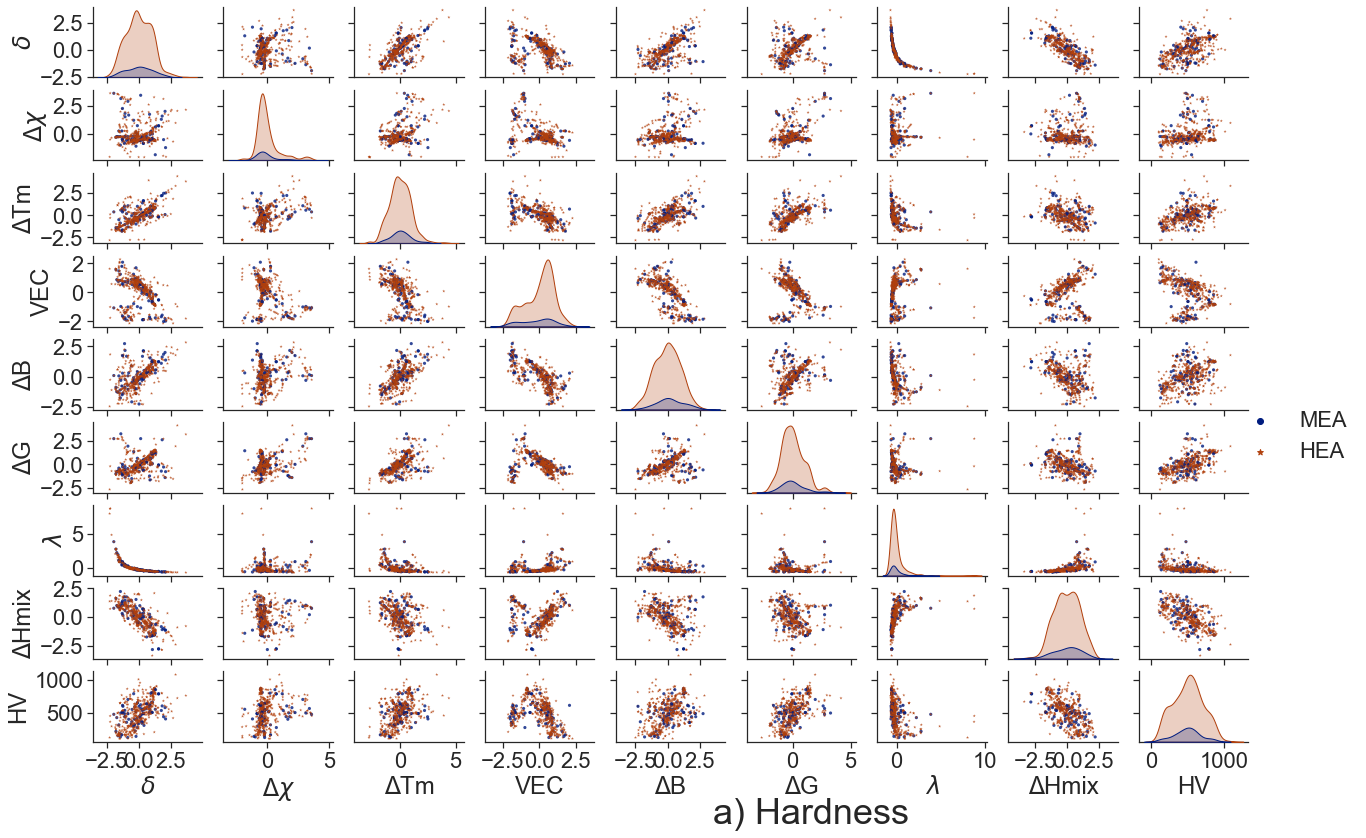

In [30]:
%run common_functions.ipynb
pairplot(df_pairplot,n_component,'a) Hardness', "plots\\hardness\\")

In [31]:
n_component.value_counts(dropna=False)

No of Components
HEA                 532
MEA                  82
dtype: int64

## 5.2 PCA Feature Selections

### PCA_1: Feature selection by PCA to capture 0.9 data variance without fabrication process
#### 7 principal component required here.


### PCA_2: Feature selection by PCA to capture 0.9 data variance with fabrication process
#### 8 principal component required here.

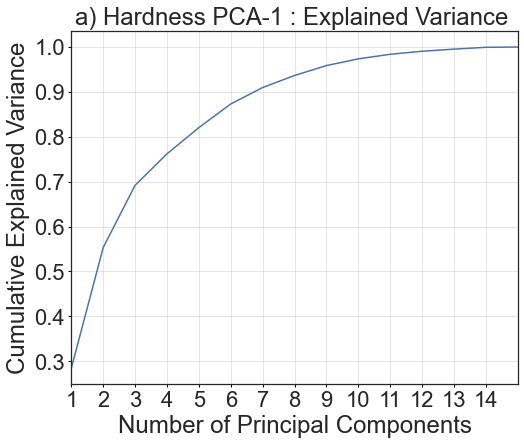

No. of components for PCA: 7
Explained variance for  7 components:  [0.28447563 0.26901745 0.13848352 0.07009526 0.05838909 0.05272371
 0.03661802]
Cumulative: [0.28447563 0.55349307 0.69197659 0.76207186 0.82046095 0.87318466
 0.90980268]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


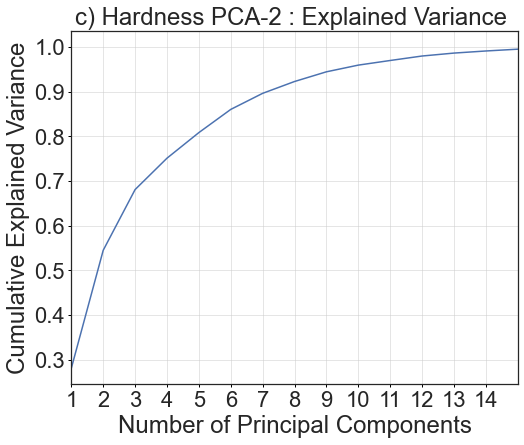

No. of components for PCA: 8
Explained variance for  8 components:  [0.28064191 0.26416384 0.13595865 0.07027742 0.05733278 0.05190788
 0.03598828 0.0264966 ]
Cumulative: [0.28064191 0.54480575 0.6807644  0.75104182 0.8083746  0.86028248
 0.89627076 0.92276736]


In [32]:
%run common_functions.ipynb

# df_pca_1: dataset for training
# test_pca_1 : Dataset for test

pca_1, df_pca_1 = pca_fs(std_df,"plots\\hardness\\Hv_pca-1", title="a) Hardness PCA-1")
import pickle
pickle.dump(pca_1, open(path+'pca_1.pkl','wb'))

std_test = scaler.transform(X_test_no_fab)
test_pca_1 =  pca_1.transform(std_test)



# df_pca_2: dataset for training
# test_pca_2 : Dataset for test
std_df_fab = np.column_stack((std_df,X_train_fab))
pca_2, df_pca_2 = pca_fs(std_df_fab,"plots\\hardness\\Hv_pca-2", title="c) Hardness PCA-2")

pickle.dump(pca_2, open(path+'pca_2.pkl','wb'))

std_test_fab = np.column_stack((std_test,X_test_fab))
test_pca_2 =  pca_2.transform(std_test_fab)

# 6. Machine Learning Model

# PCC- Model 1

## Hyper-parameter tuning by RandomSearchCV()

### change n_iter to change selection of "n model" randomly from the possible combinations of models
### change cv to change the cross validation
### put n_iter = less than 100, cv= 10 to test sample tuning the tuning 

In [ ]:

%run common_functions.ipynb
# For Learning rates, weight constraint and init_weights
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

input_dim = df_pcc_1.shape[1]
from tensorflow.keras.optimizers import Adam, Nadam
# 
epochs = 150
batch_size = [4,6]
layers = [8]
neuron_size = [48,64]
optimizer = ['RMSprop','Adam', 'Nadam']
activation = ['relu', 'selu']
drops = [0.05,0.075, 0.1]
learning_rate = [0.00025,0.0005,0.00075,0.001]
weight_constraint = [2]
init_weights = ['he_uniform']

# Complete set of hyper-parameter

#batch_size = [2,4,6]
#layers = [4,6]
#neuron_size = [32,48,64]
#optimizer = ['SGD','RMSprop', 'Adam', 'Nadam']
#activation = ['relu', 'selu', 'LeakyReLU', 'PReLU']
#drops = [0.05,0.075,0.08,0.1,0.15,0.2]
#learning_rate = [0.0001,0.00025,0.000375,0.0004,0.0005,0.00075,0.001,0.005,0.01]

#For weight initialization
#weight_constraint = [1,2,3]
#init_weights = ['uniform', 'normal', 'he_uniform']


model = KerasRegressor(build_fn= create_model, 
                        epochs= epochs, 
                        batch_size = batch_size, 
                        verbose=2)


# Make dictionary of learning rate and momuntum grid

param_grid = dict( batch_size = batch_size, lyrs=layers, neuron_size = neuron_size, opt=optimizer,act=activation, dr=drops, learning_rate = learning_rate,init_weights=init_weights, weight_constraint = weight_constraint)
grid = RandomizedSearchCV(estimator= model, param_distributions=param_grid,n_iter=30, n_jobs=-1, cv=10, scoring='r2', verbose=2)

grid_result = grid.fit(df_pcc_1, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

In [35]:
%run common_functions.ipynb
import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = df_pcc_1.shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pcc_1.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pcc_1 = create_model(lyrs=8, neuron_size=48, act='selu', opt='Adam', dr=0.05, learning_rate=0.00075,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pcc_1=model_pcc_1.fit(df_pcc_1, y_train,epochs=150,batch_size=4,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

8
Epoch 1/150
138/138 - 2s - loss: 125018.0547 - mse: 125010.2891 - mape: 60.2263 - mae: 285.1316 - root_mean_squared_error: 353.5679 - val_loss: 32819.0117 - val_mse: 32811.1445 - val_mape: 34.5960 - val_mae: 148.6623 - val_root_mean_squared_error: 181.1385 - 2s/epoch - 15ms/step
Epoch 2/150
138/138 - 0s - loss: 28291.5879 - mse: 28283.6992 - mape: 31.1798 - mae: 132.9611 - root_mean_squared_error: 168.1776 - val_loss: 25998.2266 - val_mse: 25990.3223 - val_mape: 28.5089 - val_mae: 129.1041 - val_root_mean_squared_error: 161.2151 - 341ms/epoch - 2ms/step
Epoch 3/150
138/138 - 0s - loss: 26638.4707 - mse: 26630.5508 - mape: 30.8346 - mae: 128.6059 - root_mean_squared_error: 163.1887 - val_loss: 15470.0488 - val_mse: 15462.1201 - val_mape: 23.0172 - val_mae: 99.9676 - val_root_mean_squared_error: 124.3468 - 349ms/epoch - 3ms/step
Epoch 4/150
138/138 - 0s - loss: 22783.5898 - mse: 22775.6426 - mape: 28.3513 - mae: 117.1404 - root_mean_squared_error: 150.9160 - val_loss: 13335.9062 - val_

Epoch 31/150
138/138 - 0s - loss: 13481.2939 - mse: 13472.6299 - mape: 21.7274 - mae: 90.4099 - root_mean_squared_error: 116.0717 - val_loss: 11920.2588 - val_mse: 11911.5762 - val_mape: 19.7963 - val_mae: 82.2143 - val_root_mean_squared_error: 109.1402 - 375ms/epoch - 3ms/step
Epoch 32/150
138/138 - 0s - loss: 11707.6279 - mse: 11698.9268 - mape: 21.0393 - mae: 85.8947 - root_mean_squared_error: 108.1616 - val_loss: 11076.2881 - val_mse: 11067.5801 - val_mape: 19.6221 - val_mae: 81.5297 - val_root_mean_squared_error: 105.2026 - 361ms/epoch - 3ms/step
Epoch 33/150
138/138 - 0s - loss: 12402.9434 - mse: 12394.2119 - mape: 21.1276 - mae: 86.5353 - root_mean_squared_error: 111.3293 - val_loss: 9891.2646 - val_mse: 9882.5244 - val_mape: 19.9684 - val_mae: 77.6427 - val_root_mean_squared_error: 99.4109 - 390ms/epoch - 3ms/step
Epoch 34/150
138/138 - 0s - loss: 12049.8232 - mse: 12041.0742 - mape: 20.8768 - mae: 86.3893 - root_mean_squared_error: 109.7318 - val_loss: 9798.6396 - val_mse: 978

Epoch 61/150
138/138 - 0s - loss: 8855.2549 - mse: 8845.9062 - mape: 17.3500 - mae: 73.1170 - root_mean_squared_error: 94.0527 - val_loss: 9087.1885 - val_mse: 9077.8379 - val_mape: 18.0331 - val_mae: 71.1626 - val_root_mean_squared_error: 95.2777 - 425ms/epoch - 3ms/step
Epoch 62/150
138/138 - 0s - loss: 10441.6816 - mse: 10432.3184 - mape: 18.9685 - mae: 78.4189 - root_mean_squared_error: 102.1387 - val_loss: 9212.2861 - val_mse: 9202.9131 - val_mape: 18.3331 - val_mae: 71.3876 - val_root_mean_squared_error: 95.9318 - 345ms/epoch - 2ms/step
Epoch 63/150
138/138 - 0s - loss: 9698.5303 - mse: 9689.1416 - mape: 18.0243 - mae: 76.0656 - root_mean_squared_error: 98.4334 - val_loss: 10004.9678 - val_mse: 9995.5674 - val_mape: 19.0081 - val_mae: 76.5008 - val_root_mean_squared_error: 99.9778 - 375ms/epoch - 3ms/step
Epoch 64/150
138/138 - 0s - loss: 8882.1689 - mse: 8872.7559 - mape: 17.4567 - mae: 72.6033 - root_mean_squared_error: 94.1953 - val_loss: 10862.2334 - val_mse: 10852.8135 - val

Epoch 91/150
138/138 - 0s - loss: 8963.6240 - mse: 8953.8389 - mape: 17.6073 - mae: 71.6943 - root_mean_squared_error: 94.6247 - val_loss: 10854.9580 - val_mse: 10845.1582 - val_mape: 20.4986 - val_mae: 78.2582 - val_root_mean_squared_error: 104.1401 - 402ms/epoch - 3ms/step
Epoch 92/150
138/138 - 0s - loss: 8024.6079 - mse: 8014.8071 - mape: 16.1610 - mae: 66.0152 - root_mean_squared_error: 89.5255 - val_loss: 11779.4570 - val_mse: 11769.6455 - val_mape: 19.5732 - val_mae: 78.0904 - val_root_mean_squared_error: 108.4880 - 352ms/epoch - 3ms/step
Epoch 93/150
138/138 - 0s - loss: 8148.3062 - mse: 8138.4946 - mape: 16.2010 - mae: 68.3456 - root_mean_squared_error: 90.2136 - val_loss: 9407.0928 - val_mse: 9397.2705 - val_mape: 18.6090 - val_mae: 71.9747 - val_root_mean_squared_error: 96.9395 - 393ms/epoch - 3ms/step
Epoch 94/150
138/138 - 0s - loss: 7004.8423 - mse: 6995.0112 - mape: 15.4612 - mae: 62.7073 - root_mean_squared_error: 83.6362 - val_loss: 11783.0039 - val_mse: 11773.1699 - v

Epoch 121/150
138/138 - 0s - loss: 6691.0234 - mse: 6680.8813 - mape: 14.7420 - mae: 62.4139 - root_mean_squared_error: 81.7367 - val_loss: 8723.1455 - val_mse: 8713.0039 - val_mape: 17.7922 - val_mae: 67.9244 - val_root_mean_squared_error: 93.3435 - 372ms/epoch - 3ms/step
Epoch 122/150
138/138 - 0s - loss: 7314.5952 - mse: 7304.4351 - mape: 15.6093 - mae: 64.6202 - root_mean_squared_error: 85.4660 - val_loss: 9918.9512 - val_mse: 9908.8008 - val_mape: 18.4833 - val_mae: 72.1807 - val_root_mean_squared_error: 99.5430 - 381ms/epoch - 3ms/step
Epoch 123/150
138/138 - 0s - loss: 6652.2612 - mse: 6642.0962 - mape: 15.2111 - mae: 61.4389 - root_mean_squared_error: 81.4991 - val_loss: 8695.6387 - val_mse: 8685.4834 - val_mape: 17.3078 - val_mae: 66.5863 - val_root_mean_squared_error: 93.1959 - 378ms/epoch - 3ms/step
Epoch 124/150
138/138 - 0s - loss: 6043.0312 - mse: 6032.8652 - mape: 14.2935 - mae: 58.6493 - root_mean_squared_error: 77.6715 - val_loss: 10407.5605 - val_mse: 10397.3877 - val

In [36]:
model_pcc_1.save(path+"model_pcc_1.h5")

In [37]:
test_loss = model_pcc_1.evaluate(test_pcc_1, y_test, verbose=2)

3/3 - 0s - loss: 5639.7271 - mse: 5629.2778 - mape: 15.3069 - mae: 57.6570 - root_mean_squared_error: 75.0285 - 26ms/epoch - 9ms/step


In [38]:
model_pcc_1.save(path+"model_pcc_1.h5")

In [39]:
from keras.models import load_model

best_model_pcc_1 = load_model(path+'best_model_pcc_1.h5')
best_model_pcc_1.evaluate(test_pcc_1, y_test, verbose=2)

3/3 - 0s - loss: 5771.0083 - mse: 5760.5796 - mape: 15.5196 - mae: 58.5181 - root_mean_squared_error: 75.8985 - 167ms/epoch - 56ms/step


[5771.00830078125,
 5760.57958984375,
 15.519632339477539,
 58.51814270019531,
 75.89848327636719]

In [40]:
%run common_functions.ipynb
import tensorflow as tf

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.constraints import max_norm

# Run model with 90/10 datasets with optimized parameters
input_dim = df_pcc_2.shape[1]
print(input_dim)

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pcc_2.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pcc_2 = create_model(lyrs=8, neuron_size=48, act='selu', opt='Adam', dr=0.05, learning_rate=0.00075,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pcc_2=model_pcc_2.fit(df_pcc_2, y_train,epochs=150,batch_size=4,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

12
Epoch 1/150
138/138 - 1s - loss: 115261.6797 - mse: 115253.9609 - mape: 56.4199 - mae: 270.1592 - root_mean_squared_error: 339.4907 - val_loss: 35616.5859 - val_mse: 35608.7734 - val_mape: 31.4022 - val_mae: 142.7235 - val_root_mean_squared_error: 188.7029 - 1s/epoch - 11ms/step
Epoch 2/150
138/138 - 0s - loss: 26842.9336 - mse: 26835.1133 - mape: 30.6218 - mae: 128.5349 - root_mean_squared_error: 163.8143 - val_loss: 23543.2676 - val_mse: 23535.4277 - val_mape: 25.8763 - val_mae: 116.4165 - val_root_mean_squared_error: 153.4126 - 336ms/epoch - 2ms/step
Epoch 3/150
138/138 - 0s - loss: 23255.0000 - mse: 23247.1602 - mape: 28.8696 - mae: 118.7486 - root_mean_squared_error: 152.4702 - val_loss: 16626.4004 - val_mse: 16618.5352 - val_mape: 22.7750 - val_mae: 99.8590 - val_root_mean_squared_error: 128.9129 - 337ms/epoch - 2ms/step
Epoch 4/150
138/138 - 0s - loss: 21750.9902 - mse: 21743.0957 - mape: 27.9702 - mae: 113.0908 - root_mean_squared_error: 147.4554 - val_loss: 12349.3154 - val

Epoch 31/150
138/138 - 0s - loss: 11787.8936 - mse: 11779.2959 - mape: 20.2988 - mae: 83.2589 - root_mean_squared_error: 108.5325 - val_loss: 9508.5322 - val_mse: 9499.9131 - val_mape: 19.3275 - val_mae: 73.7917 - val_root_mean_squared_error: 97.4675 - 354ms/epoch - 3ms/step
Epoch 32/150
138/138 - 0s - loss: 10397.9932 - mse: 10389.3662 - mape: 19.3758 - mae: 78.7988 - root_mean_squared_error: 101.9282 - val_loss: 10247.3584 - val_mse: 10238.7021 - val_mape: 18.6559 - val_mae: 73.7013 - val_root_mean_squared_error: 101.1865 - 335ms/epoch - 2ms/step
Epoch 33/150
138/138 - 0s - loss: 10680.0869 - mse: 10671.4219 - mape: 19.6653 - mae: 80.0938 - root_mean_squared_error: 103.3026 - val_loss: 9467.3467 - val_mse: 9458.6748 - val_mape: 17.0684 - val_mae: 67.4380 - val_root_mean_squared_error: 97.2557 - 375ms/epoch - 3ms/step
Epoch 34/150
138/138 - 0s - loss: 10516.5039 - mse: 10507.8232 - mape: 19.6600 - mae: 79.7196 - root_mean_squared_error: 102.5077 - val_loss: 8879.7920 - val_mse: 8871.1

Epoch 61/150
138/138 - 0s - loss: 8367.0137 - mse: 8357.6826 - mape: 17.3616 - mae: 70.8281 - root_mean_squared_error: 91.4204 - val_loss: 8546.9551 - val_mse: 8537.6211 - val_mape: 16.5993 - val_mae: 65.6045 - val_root_mean_squared_error: 92.3992 - 381ms/epoch - 3ms/step
Epoch 62/150
138/138 - 0s - loss: 8954.8467 - mse: 8945.4902 - mape: 17.6389 - mae: 71.4121 - root_mean_squared_error: 94.5806 - val_loss: 8299.2832 - val_mse: 8289.9072 - val_mape: 17.1972 - val_mae: 65.6473 - val_root_mean_squared_error: 91.0489 - 397ms/epoch - 3ms/step
Epoch 63/150
138/138 - 0s - loss: 8450.0312 - mse: 8440.6523 - mape: 17.1940 - mae: 70.5604 - root_mean_squared_error: 91.8730 - val_loss: 7848.8384 - val_mse: 7839.4434 - val_mape: 17.1781 - val_mae: 65.9816 - val_root_mean_squared_error: 88.5406 - 491ms/epoch - 4ms/step
Epoch 64/150
138/138 - 0s - loss: 8154.9346 - mse: 8145.5342 - mape: 16.7170 - mae: 69.6798 - root_mean_squared_error: 90.2526 - val_loss: 9151.3154 - val_mse: 9141.9043 - val_mape:

138/138 - 0s - loss: 7989.3994 - mse: 7979.6030 - mape: 16.3093 - mae: 67.2364 - root_mean_squared_error: 89.3286 - val_loss: 8805.2275 - val_mse: 8795.4150 - val_mape: 19.1579 - val_mae: 70.6204 - val_root_mean_squared_error: 93.7839 - 370ms/epoch - 3ms/step
Epoch 92/150
138/138 - 0s - loss: 7088.8174 - mse: 7079.0068 - mape: 15.6979 - mae: 62.7283 - root_mean_squared_error: 84.1368 - val_loss: 8062.5137 - val_mse: 8052.7090 - val_mape: 16.4523 - val_mae: 64.2751 - val_root_mean_squared_error: 89.7369 - 341ms/epoch - 2ms/step
Epoch 93/150
138/138 - 0s - loss: 7089.6978 - mse: 7079.8779 - mape: 15.0776 - mae: 64.4079 - root_mean_squared_error: 84.1420 - val_loss: 7759.6992 - val_mse: 7749.8657 - val_mape: 16.6949 - val_mae: 61.6750 - val_root_mean_squared_error: 88.0333 - 381ms/epoch - 3ms/step
Epoch 94/150
138/138 - 0s - loss: 6381.1963 - mse: 6371.3579 - mape: 14.6948 - mae: 60.9646 - root_mean_squared_error: 79.8208 - val_loss: 8160.7783 - val_mse: 8150.9316 - val_mape: 17.3064 - va

Epoch 121/150
138/138 - 0s - loss: 6141.1851 - mse: 6131.0200 - mape: 13.8318 - mae: 58.8554 - root_mean_squared_error: 78.3008 - val_loss: 8786.8096 - val_mse: 8776.6318 - val_mape: 18.3576 - val_mae: 66.6838 - val_root_mean_squared_error: 93.6837 - 362ms/epoch - 3ms/step
Epoch 122/150
138/138 - 0s - loss: 6774.8979 - mse: 6764.7124 - mape: 14.9845 - mae: 61.6486 - root_mean_squared_error: 82.2479 - val_loss: 8732.9922 - val_mse: 8722.8115 - val_mape: 16.7462 - val_mae: 65.4580 - val_root_mean_squared_error: 93.3960 - 354ms/epoch - 3ms/step
Epoch 123/150
138/138 - 0s - loss: 5831.2271 - mse: 5821.0303 - mape: 14.2835 - mae: 58.5504 - root_mean_squared_error: 76.2957 - val_loss: 8070.5723 - val_mse: 8060.3813 - val_mape: 17.2512 - val_mae: 65.0515 - val_root_mean_squared_error: 89.7796 - 389ms/epoch - 3ms/step
Epoch 124/150
138/138 - 0s - loss: 5658.2500 - mse: 5648.0522 - mape: 14.1788 - mae: 57.4323 - root_mean_squared_error: 75.1535 - val_loss: 8167.6240 - val_mse: 8157.4170 - val_m

In [41]:
model_pcc_2.save(path+"model_pcc_2.h5")

In [42]:
test_loss = model_pcc_2.evaluate(test_pcc_2, y_test, verbose=2)

3/3 - 0s - loss: 5979.9136 - mse: 5969.3926 - mape: 15.7096 - mae: 55.7347 - root_mean_squared_error: 77.2618 - 28ms/epoch - 9ms/step


In [43]:
model_pcc_2.save(path+"model_pcc_2.h5")

In [44]:
from keras.models import load_model

best_model_pcc_2 = load_model(path+'best_model_pcc_2.h5')
best_model_pcc_2.evaluate(test_pcc_2, y_test, verbose=2)

3/3 - 0s - loss: 5155.8506 - mse: 5145.5210 - mape: 14.6209 - mae: 51.9061 - root_mean_squared_error: 71.7323 - 201ms/epoch - 67ms/step


[5155.8505859375,
 5145.52099609375,
 14.620912551879883,
 51.9061279296875,
 71.73228454589844]

# PCA_1: Without Fab methods

In [45]:
# Run model with 90/10 datasets with optimized parameters
input_dim = df_pca_1.shape[1]
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pca_1.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pca_1 = create_model(lyrs=8, neuron_size=48, act='selu', opt='Adam', dr=0.05, learning_rate=0.00075,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pca_1=model_pca_1.fit(df_pca_1, y_train,epochs=150,batch_size=4,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

Epoch 1/150
138/138 - 1s - loss: 119153.6016 - mse: 119145.8438 - mape: 55.6745 - mae: 270.8602 - root_mean_squared_error: 345.1751 - val_loss: 27485.4043 - val_mse: 27477.5996 - val_mape: 32.1981 - val_mae: 131.6281 - val_root_mean_squared_error: 165.7637 - 1s/epoch - 10ms/step
Epoch 2/150
138/138 - 0s - loss: 32106.5215 - mse: 32098.7031 - mape: 34.0265 - mae: 139.1055 - root_mean_squared_error: 179.1611 - val_loss: 19653.7129 - val_mse: 19645.8574 - val_mape: 28.3572 - val_mae: 107.8443 - val_root_mean_squared_error: 140.1637 - 374ms/epoch - 3ms/step
Epoch 3/150
138/138 - 0s - loss: 26918.8320 - mse: 26910.9668 - mape: 32.6363 - mae: 130.2433 - root_mean_squared_error: 164.0456 - val_loss: 16860.3926 - val_mse: 16852.5137 - val_mape: 24.5781 - val_mae: 100.4152 - val_root_mean_squared_error: 129.8172 - 371ms/epoch - 3ms/step
Epoch 4/150
138/138 - 0s - loss: 22536.3477 - mse: 22528.4434 - mape: 29.7565 - mae: 119.2294 - root_mean_squared_error: 150.0948 - val_loss: 14245.3203 - val_m

Epoch 31/150
138/138 - 0s - loss: 11480.4678 - mse: 11471.8057 - mape: 20.7583 - mae: 82.0814 - root_mean_squared_error: 107.1065 - val_loss: 10464.5674 - val_mse: 10455.8926 - val_mape: 19.5290 - val_mae: 72.2737 - val_root_mean_squared_error: 102.2541 - 362ms/epoch - 3ms/step
Epoch 32/150
138/138 - 0s - loss: 11788.2188 - mse: 11779.5322 - mape: 21.0825 - mae: 84.7852 - root_mean_squared_error: 108.5336 - val_loss: 10388.3789 - val_mse: 10379.6699 - val_mape: 20.3282 - val_mae: 74.6250 - val_root_mean_squared_error: 101.8807 - 361ms/epoch - 3ms/step
Epoch 33/150
138/138 - 0s - loss: 12437.0938 - mse: 12428.3721 - mape: 20.8756 - mae: 84.3106 - root_mean_squared_error: 111.4826 - val_loss: 10965.7705 - val_mse: 10957.0342 - val_mape: 20.5884 - val_mae: 75.1463 - val_root_mean_squared_error: 104.6758 - 388ms/epoch - 3ms/step
Epoch 34/150
138/138 - 0s - loss: 10955.1387 - mse: 10946.3984 - mape: 20.1946 - mae: 81.3752 - root_mean_squared_error: 104.6250 - val_loss: 10329.0684 - val_mse:

Epoch 61/150
138/138 - 0s - loss: 9186.5312 - mse: 9177.2451 - mape: 17.9433 - mae: 73.7289 - root_mean_squared_error: 95.7979 - val_loss: 8953.4707 - val_mse: 8944.1758 - val_mape: 17.9381 - val_mae: 69.1406 - val_root_mean_squared_error: 94.5737 - 387ms/epoch - 3ms/step
Epoch 62/150
138/138 - 0s - loss: 9795.7100 - mse: 9786.4131 - mape: 18.9453 - mae: 75.4858 - root_mean_squared_error: 98.9263 - val_loss: 11088.8291 - val_mse: 11079.5146 - val_mape: 20.4161 - val_mae: 76.9900 - val_root_mean_squared_error: 105.2593 - 317ms/epoch - 2ms/step
Epoch 63/150
138/138 - 0s - loss: 8945.4033 - mse: 8936.0840 - mape: 17.5655 - mae: 71.2436 - root_mean_squared_error: 94.5309 - val_loss: 9215.8857 - val_mse: 9206.5586 - val_mape: 20.2850 - val_mae: 72.4870 - val_root_mean_squared_error: 95.9508 - 367ms/epoch - 3ms/step
Epoch 64/150
138/138 - 0s - loss: 9690.2012 - mse: 9680.8652 - mape: 18.8489 - mae: 75.2065 - root_mean_squared_error: 98.3914 - val_loss: 10615.4873 - val_mse: 10606.1455 - val_

Epoch 91/150
138/138 - 0s - loss: 8665.4883 - mse: 8655.7979 - mape: 17.1325 - mae: 70.8543 - root_mean_squared_error: 93.0365 - val_loss: 8251.8682 - val_mse: 8242.1816 - val_mape: 18.5189 - val_mae: 65.6769 - val_root_mean_squared_error: 90.7865 - 377ms/epoch - 3ms/step
Epoch 92/150
138/138 - 0s - loss: 7576.9482 - mse: 7567.2510 - mape: 16.0216 - mae: 65.1438 - root_mean_squared_error: 86.9899 - val_loss: 9132.5078 - val_mse: 9122.8096 - val_mape: 18.1096 - val_mae: 71.2153 - val_root_mean_squared_error: 95.5134 - 349ms/epoch - 3ms/step
Epoch 93/150
138/138 - 0s - loss: 8123.7808 - mse: 8114.0718 - mape: 16.8338 - mae: 68.9476 - root_mean_squared_error: 90.0781 - val_loss: 9247.7637 - val_mse: 9238.0537 - val_mape: 18.4330 - val_mae: 69.3398 - val_root_mean_squared_error: 96.1148 - 369ms/epoch - 3ms/step
Epoch 94/150
138/138 - 0s - loss: 8482.7998 - mse: 8473.0850 - mape: 17.0858 - mae: 68.6312 - root_mean_squared_error: 92.0494 - val_loss: 10050.9883 - val_mse: 10041.2754 - val_map

Epoch 121/150
138/138 - 0s - loss: 7185.6313 - mse: 7175.6128 - mape: 15.7147 - mae: 65.3179 - root_mean_squared_error: 84.7090 - val_loss: 8366.3037 - val_mse: 8356.2832 - val_mape: 17.4029 - val_mae: 65.2877 - val_root_mean_squared_error: 91.4127 - 393ms/epoch - 3ms/step
Epoch 122/150
138/138 - 0s - loss: 7185.2090 - mse: 7175.1787 - mape: 15.5882 - mae: 64.4232 - root_mean_squared_error: 84.7064 - val_loss: 8340.5186 - val_mse: 8330.4854 - val_mape: 17.5548 - val_mae: 62.7027 - val_root_mean_squared_error: 91.2715 - 411ms/epoch - 3ms/step
Epoch 123/150
138/138 - 0s - loss: 6519.0571 - mse: 6509.0239 - mape: 15.1159 - mae: 61.1854 - root_mean_squared_error: 80.6785 - val_loss: 8390.1338 - val_mse: 8380.0840 - val_mape: 18.5027 - val_mae: 64.9468 - val_root_mean_squared_error: 91.5428 - 409ms/epoch - 3ms/step
Epoch 124/150
138/138 - 0s - loss: 6898.9312 - mse: 6888.8848 - mape: 15.7990 - mae: 63.9123 - root_mean_squared_error: 82.9993 - val_loss: 8727.1182 - val_mse: 8717.0732 - val_m

In [46]:
model_pca_1.save(path+"model_pca_1.h5")

In [47]:
test_loss = model_pca_1.evaluate(test_pca_1, y_test, verbose=2)

3/3 - 0s - loss: 6311.4644 - mse: 6301.1504 - mape: 16.8091 - mae: 60.9349 - root_mean_squared_error: 79.3798 - 24ms/epoch - 8ms/step


In [48]:
best_model_pca_1 = load_model(path+'best_model_pca_1.h5')
best_model_pca_1.evaluate(test_pca_1, y_test, verbose=2)

3/3 - 0s - loss: 5705.9780 - mse: 5695.7935 - mape: 16.3325 - mae: 57.7066 - root_mean_squared_error: 75.4705 - 251ms/epoch - 84ms/step


[5705.97802734375,
 5695.79345703125,
 16.332530975341797,
 57.70655059814453,
 75.4704818725586]

# PCA_2: Model with Fab process

In [49]:
# Run model with 90/10 datasets with optimized parameters
input_dim = df_pca_2.shape[1]
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras_adabound import AdaBound
from keras.activations import elu
from tensorflow.keras.activations import selu

tf.random.set_seed(42)

from keras.constraints import maxnorm   # To setup weight constraints
from keras.callbacks import ModelCheckpoint, EarlyStopping
max_epochs = 150
np.random.seed(42)
#callbacks = [EarlyStopping(monitor='val_mape', mode='min', restore_best_weights=True, patience=10, verbose =1),
             #ModelCheckpoint(filepath='best_model.h5', monitor='val_mape', save_best_only=True)]
callbacks = [ModelCheckpoint(filepath=path+'best_model_pca_2.h5', monitor='val_root_mean_squared_error', save_best_only=True)]
model_pca_2 = create_model(lyrs=8, neuron_size=48, act='selu', opt='Adam', dr=0.05, learning_rate=0.00075,init_weights='he_uniform', weight_constraint = 2)

# train model on full train set, with 80/20 CV split
history_pca_2=model_pca_2.fit(df_pca_2, y_train,epochs=150,batch_size=4,validation_split=0.1, callbacks= [callbacks], verbose=2)
#val_loss = np.mean(training.history['val_loss'])

Epoch 1/150
138/138 - 1s - loss: 122184.9844 - mse: 122177.1562 - mape: 56.5567 - mae: 275.2180 - root_mean_squared_error: 349.5385 - val_loss: 29413.6621 - val_mse: 29405.8164 - val_mape: 33.3629 - val_mae: 136.3679 - val_root_mean_squared_error: 171.4812 - 1s/epoch - 10ms/step
Epoch 2/150
138/138 - 0s - loss: 33022.8633 - mse: 33014.9805 - mape: 34.1675 - mae: 139.9329 - root_mean_squared_error: 181.7003 - val_loss: 20482.9434 - val_mse: 20475.0488 - val_mape: 28.6561 - val_mae: 110.9289 - val_root_mean_squared_error: 143.0910 - 321ms/epoch - 2ms/step
Epoch 3/150
138/138 - 0s - loss: 26790.9629 - mse: 26783.0625 - mape: 32.3397 - mae: 129.6472 - root_mean_squared_error: 163.6553 - val_loss: 16485.3809 - val_mse: 16477.4551 - val_mape: 24.1040 - val_mae: 99.0860 - val_root_mean_squared_error: 128.3645 - 341ms/epoch - 2ms/step
Epoch 4/150
138/138 - 0s - loss: 22480.1426 - mse: 22472.1953 - mape: 29.7184 - mae: 119.0459 - root_mean_squared_error: 149.9073 - val_loss: 13418.6758 - val_ms

Epoch 31/150
138/138 - 0s - loss: 11283.8066 - mse: 11275.0801 - mape: 20.7311 - mae: 82.3539 - root_mean_squared_error: 106.1842 - val_loss: 9676.7773 - val_mse: 9668.0361 - val_mape: 19.9646 - val_mae: 72.0563 - val_root_mean_squared_error: 98.3262 - 383ms/epoch - 3ms/step
Epoch 32/150
138/138 - 0s - loss: 11252.4189 - mse: 11243.6699 - mape: 20.0397 - mae: 81.8429 - root_mean_squared_error: 106.0362 - val_loss: 10023.3643 - val_mse: 10014.5869 - val_mape: 20.6780 - val_mae: 75.5913 - val_root_mean_squared_error: 100.0729 - 348ms/epoch - 3ms/step
Epoch 33/150
138/138 - 0s - loss: 11558.2764 - mse: 11549.4912 - mape: 19.9908 - mae: 80.7736 - root_mean_squared_error: 107.4686 - val_loss: 10880.9062 - val_mse: 10872.1045 - val_mape: 21.2012 - val_mae: 78.9089 - val_root_mean_squared_error: 104.2694 - 325ms/epoch - 2ms/step
Epoch 34/150
138/138 - 0s - loss: 10505.6758 - mse: 10496.8721 - mape: 19.9923 - mae: 80.5027 - root_mean_squared_error: 102.4542 - val_loss: 9283.9805 - val_mse: 927

Epoch 61/150
138/138 - 0s - loss: 8845.8428 - mse: 8836.4951 - mape: 17.7183 - mae: 72.4502 - root_mean_squared_error: 94.0026 - val_loss: 8564.9199 - val_mse: 8555.5664 - val_mape: 17.4855 - val_mae: 68.2093 - val_root_mean_squared_error: 92.4963 - 356ms/epoch - 3ms/step
Epoch 62/150
138/138 - 0s - loss: 9466.1230 - mse: 9456.7559 - mape: 18.2962 - mae: 73.2044 - root_mean_squared_error: 97.2458 - val_loss: 9933.8447 - val_mse: 9924.4678 - val_mape: 19.0009 - val_mae: 70.6954 - val_root_mean_squared_error: 99.6216 - 355ms/epoch - 3ms/step
Epoch 63/150
138/138 - 0s - loss: 9052.8184 - mse: 9043.4385 - mape: 17.6787 - mae: 70.9374 - root_mean_squared_error: 95.0970 - val_loss: 9192.6963 - val_mse: 9183.3008 - val_mape: 20.1981 - val_mae: 71.4646 - val_root_mean_squared_error: 95.8295 - 319ms/epoch - 2ms/step
Epoch 64/150
138/138 - 0s - loss: 9574.9883 - mse: 9565.5850 - mape: 18.7055 - mae: 75.2828 - root_mean_squared_error: 97.8038 - val_loss: 10797.2012 - val_mse: 10787.8008 - val_map

Epoch 91/150
138/138 - 0s - loss: 7916.1929 - mse: 7906.4268 - mape: 16.2546 - mae: 66.7747 - root_mean_squared_error: 88.9181 - val_loss: 9228.4580 - val_mse: 9218.6953 - val_mape: 19.2208 - val_mae: 67.5707 - val_root_mean_squared_error: 96.0140 - 321ms/epoch - 2ms/step
Epoch 92/150
138/138 - 0s - loss: 7389.2183 - mse: 7379.4424 - mape: 16.0628 - mae: 65.6418 - root_mean_squared_error: 85.9037 - val_loss: 9176.4229 - val_mse: 9166.6328 - val_mape: 18.0355 - val_mae: 71.5939 - val_root_mean_squared_error: 95.7425 - 344ms/epoch - 2ms/step
Epoch 93/150
138/138 - 0s - loss: 7789.7319 - mse: 7779.9375 - mape: 16.3534 - mae: 68.0494 - root_mean_squared_error: 88.2040 - val_loss: 8167.9121 - val_mse: 8158.1152 - val_mape: 17.9333 - val_mae: 64.1176 - val_root_mean_squared_error: 90.3223 - 389ms/epoch - 3ms/step
Epoch 94/150
138/138 - 0s - loss: 8122.2900 - mse: 8112.4800 - mape: 17.3524 - mae: 68.2885 - root_mean_squared_error: 90.0693 - val_loss: 9652.3643 - val_mse: 9642.5479 - val_mape:

Epoch 121/150
138/138 - 0s - loss: 6756.8560 - mse: 6746.7515 - mape: 14.9717 - mae: 61.9871 - root_mean_squared_error: 82.1386 - val_loss: 8180.7593 - val_mse: 8170.6558 - val_mape: 17.8160 - val_mae: 65.6923 - val_root_mean_squared_error: 90.3917 - 354ms/epoch - 3ms/step
Epoch 122/150
138/138 - 0s - loss: 6823.8584 - mse: 6813.7373 - mape: 15.7666 - mae: 63.6787 - root_mean_squared_error: 82.5454 - val_loss: 8424.5439 - val_mse: 8414.4199 - val_mape: 17.9701 - val_mae: 62.6670 - val_root_mean_squared_error: 91.7301 - 265ms/epoch - 2ms/step
Epoch 123/150
138/138 - 0s - loss: 6179.0942 - mse: 6168.9658 - mape: 14.9379 - mae: 58.8174 - root_mean_squared_error: 78.5428 - val_loss: 8091.4565 - val_mse: 8081.3105 - val_mape: 18.4830 - val_mae: 66.8558 - val_root_mean_squared_error: 89.8961 - 348ms/epoch - 3ms/step
Epoch 124/150
138/138 - 0s - loss: 6301.2954 - mse: 6291.1621 - mape: 14.9006 - mae: 59.9827 - root_mean_squared_error: 79.3168 - val_loss: 8156.7100 - val_mse: 8146.5664 - val_m

In [50]:
model_pca_2.save(path+"model_pca_2.h5")

In [51]:
test_loss = model_pca_2.evaluate(test_pca_2, y_test, verbose=2)

3/3 - 0s - loss: 6154.5923 - mse: 6144.1362 - mape: 16.0900 - mae: 59.8786 - root_mean_squared_error: 78.3845 - 27ms/epoch - 9ms/step


In [52]:
best_model_pca_2 = load_model(path+'best_model_pca_2.h5')
best_model_pca_2.evaluate(test_pca_2, y_test, verbose=2)

3/3 - 0s - loss: 4905.3896 - mse: 4895.3521 - mape: 15.6564 - mae: 54.8236 - root_mean_squared_error: 69.9668 - 221ms/epoch - 74ms/step


[4905.3896484375,
 4895.35205078125,
 15.656405448913574,
 54.82358169555664,
 69.96678924560547]

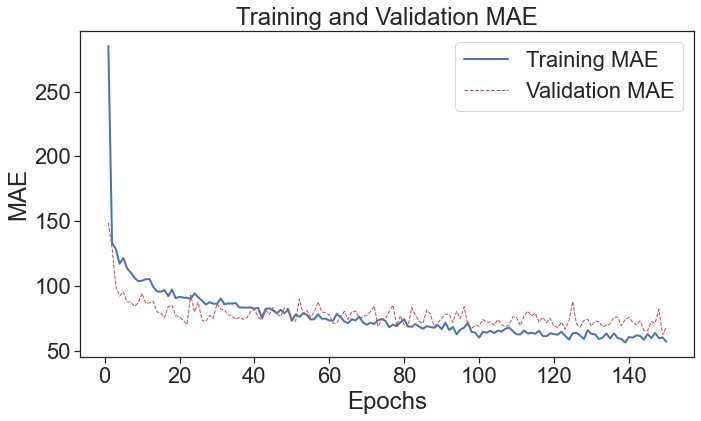

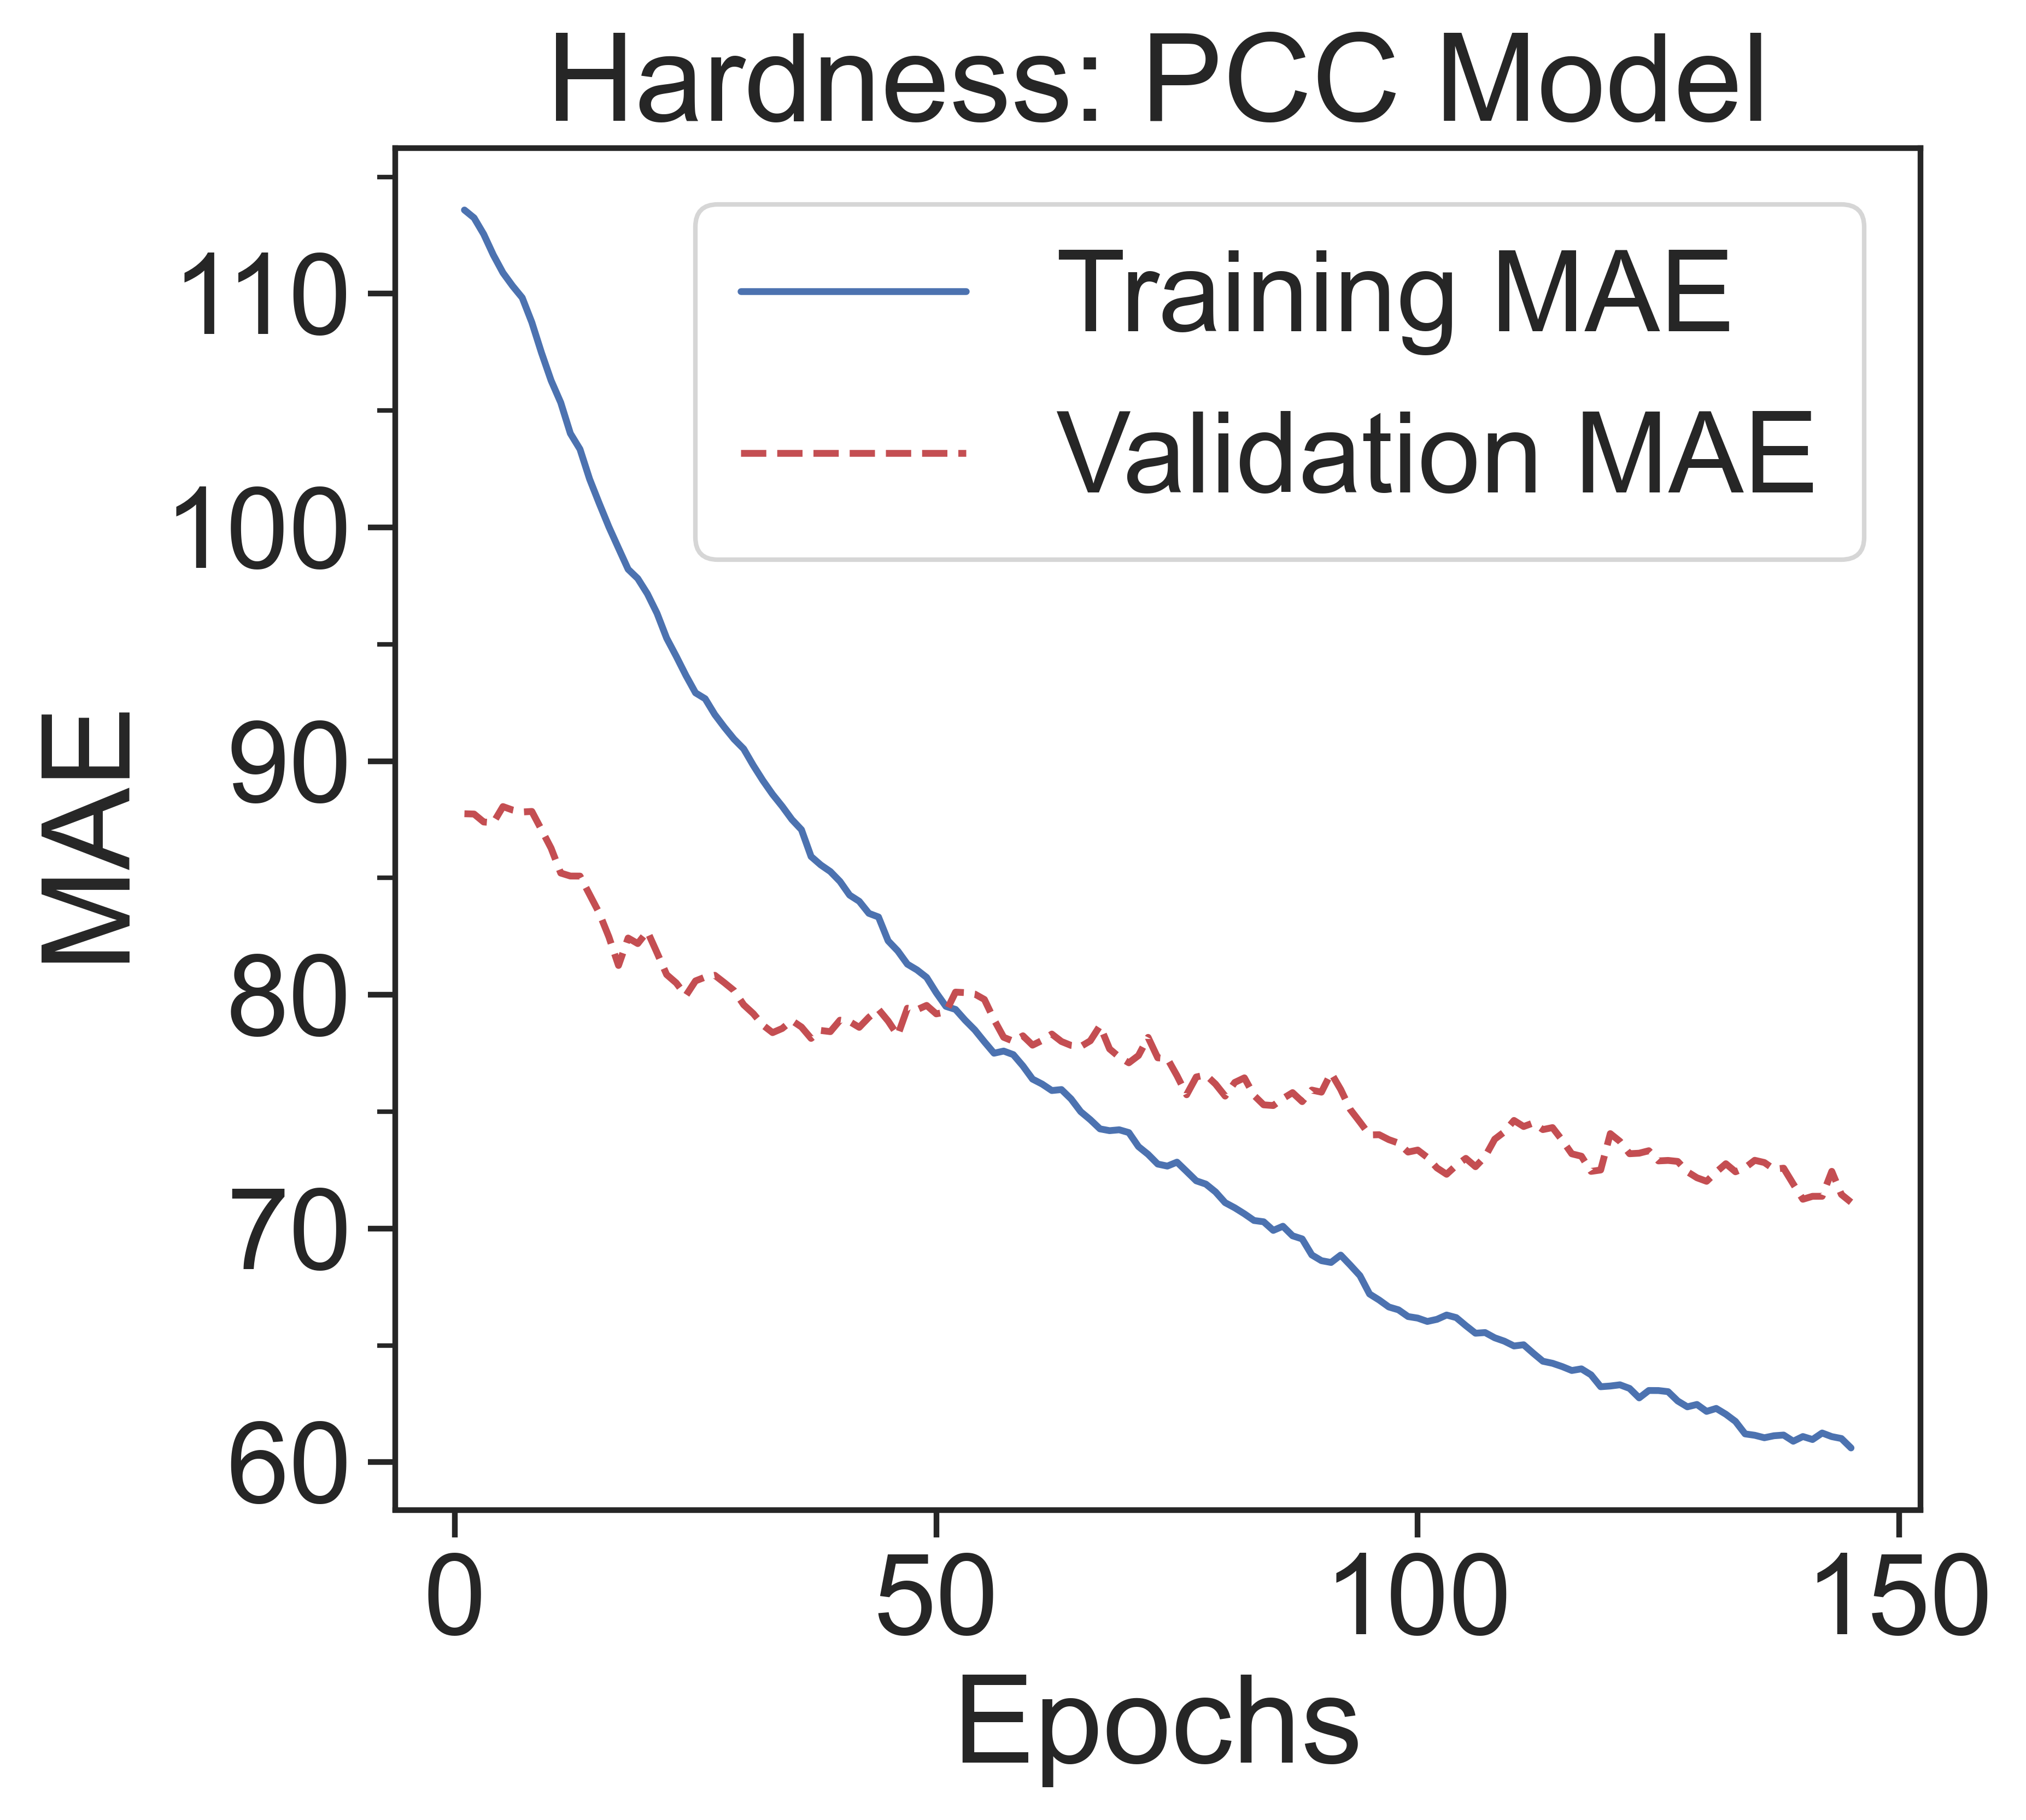

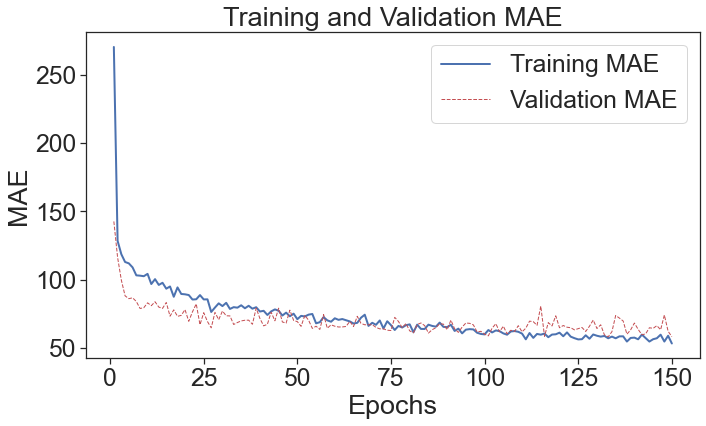

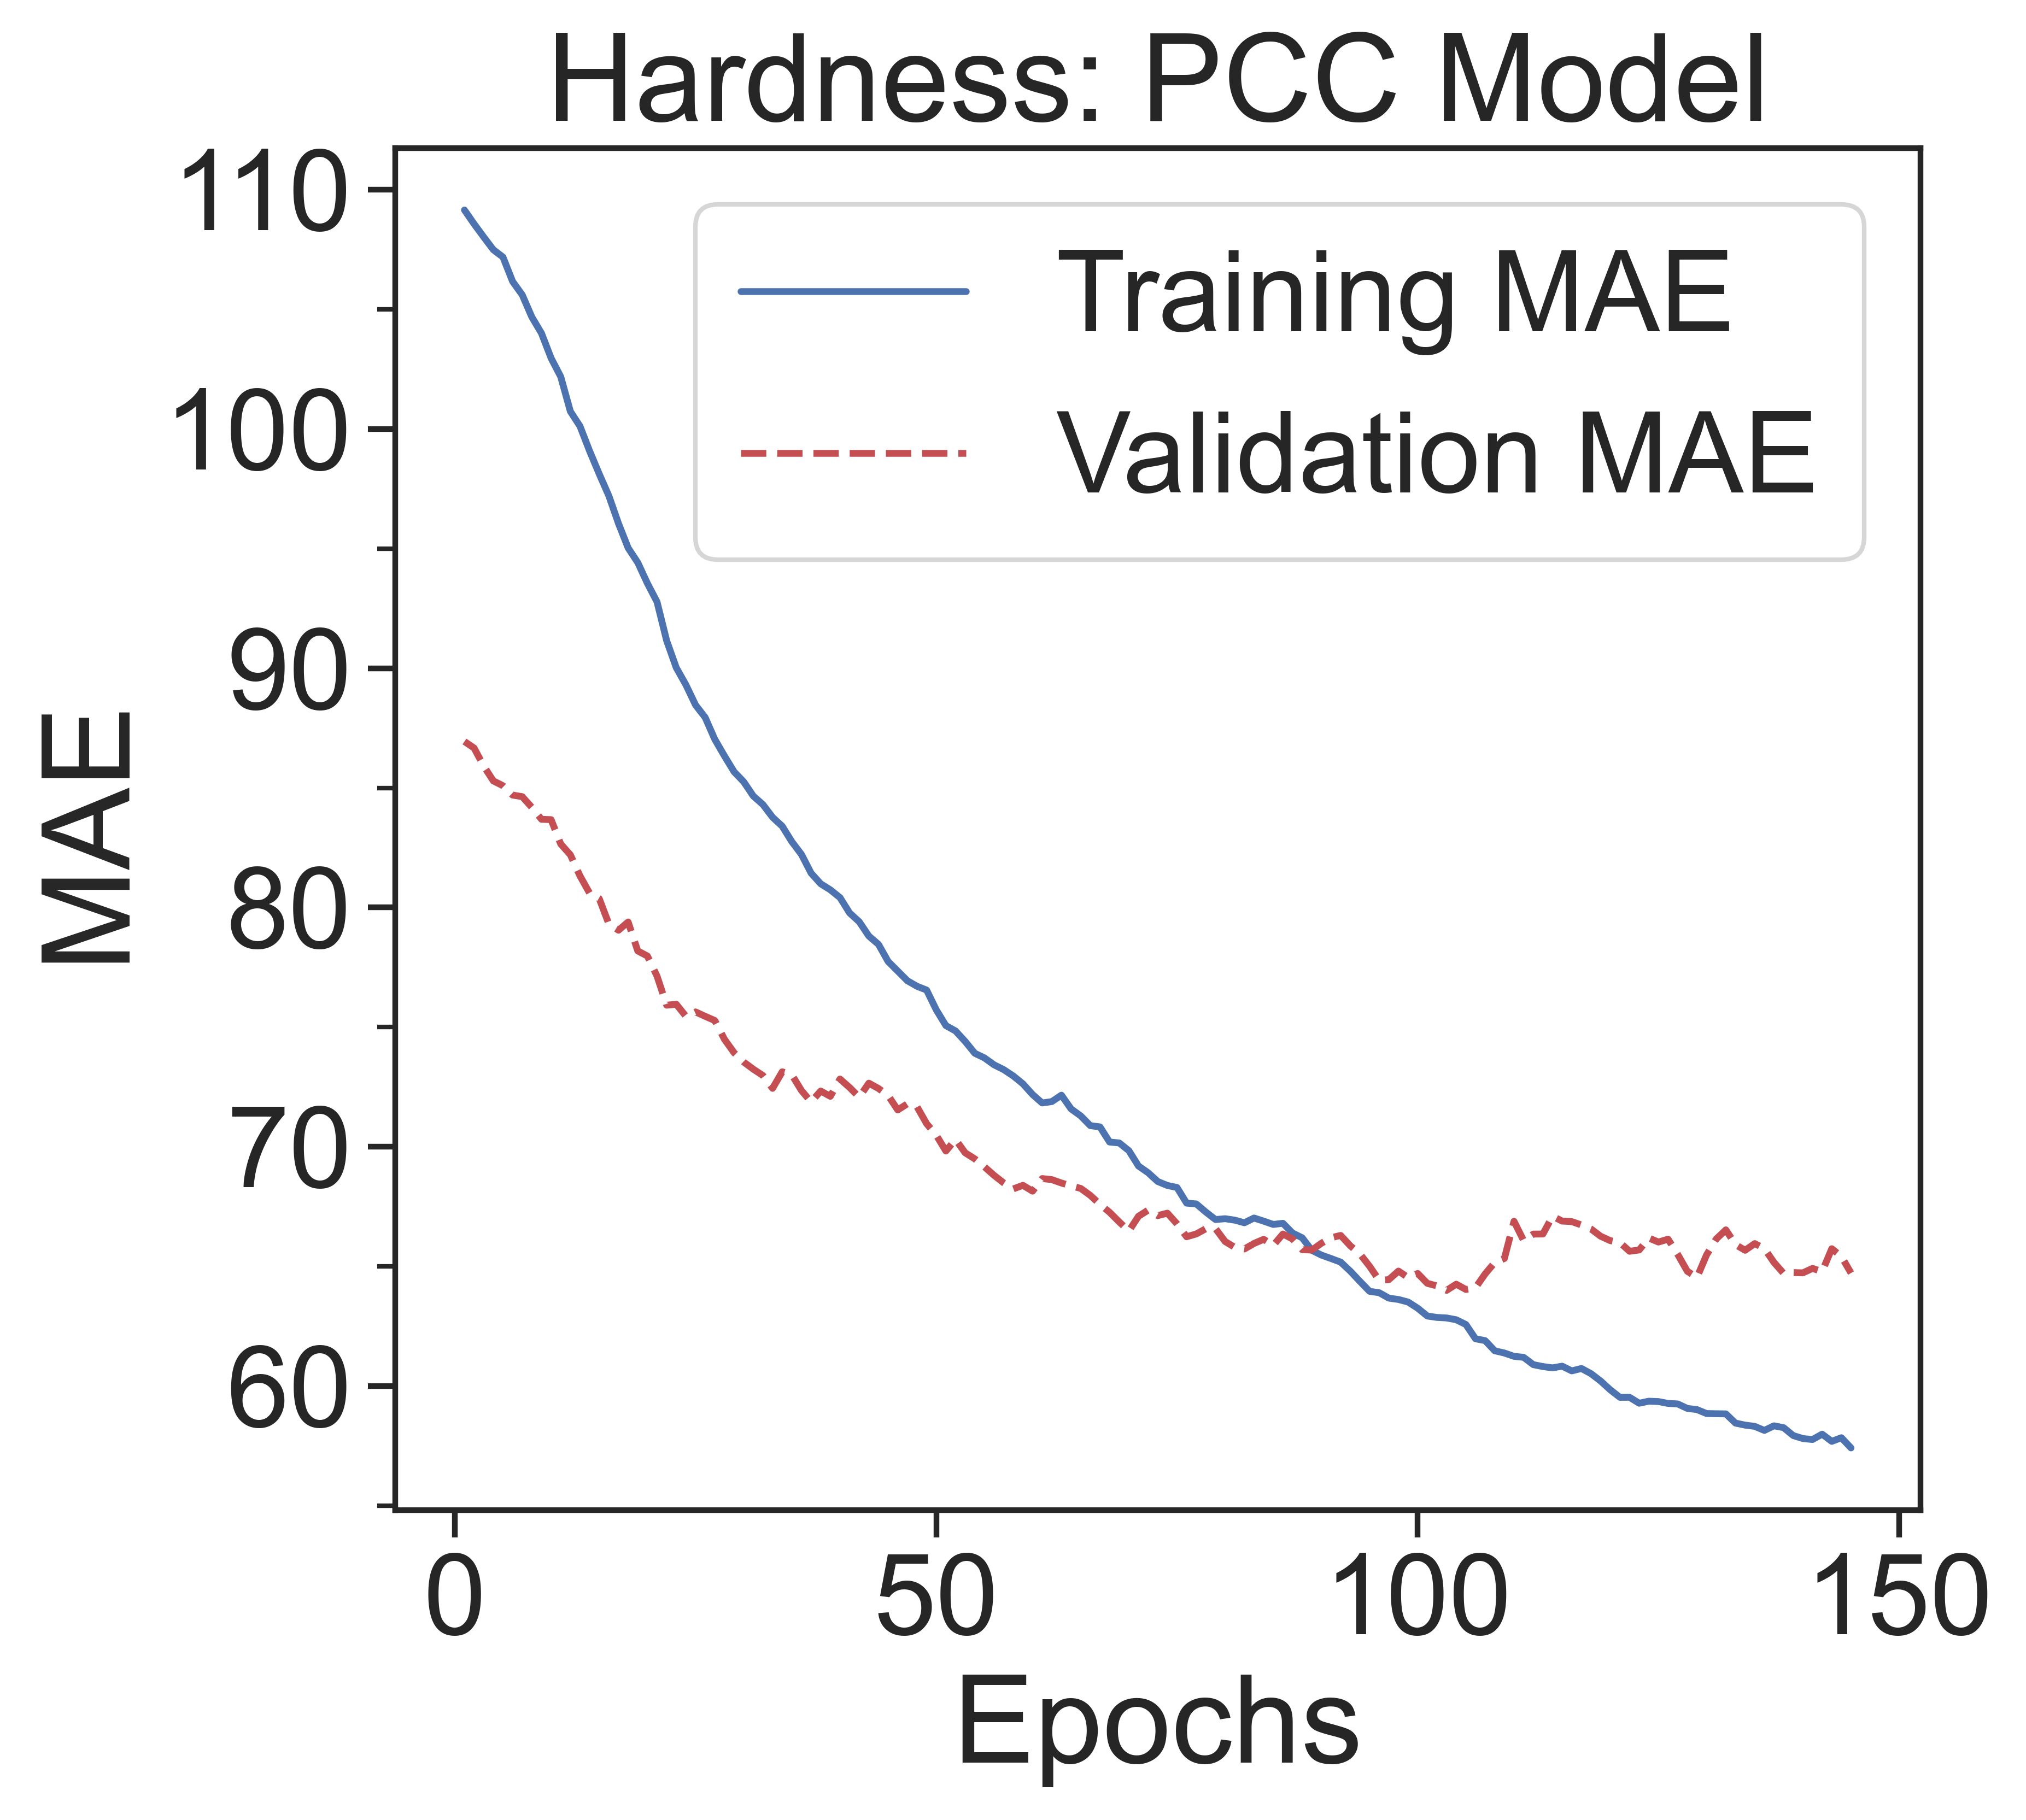

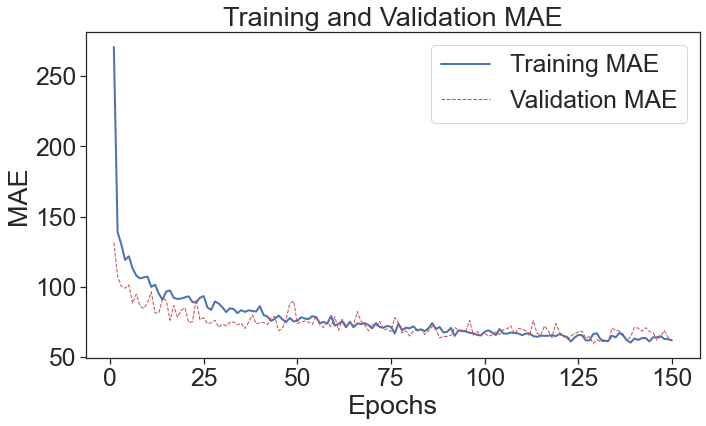

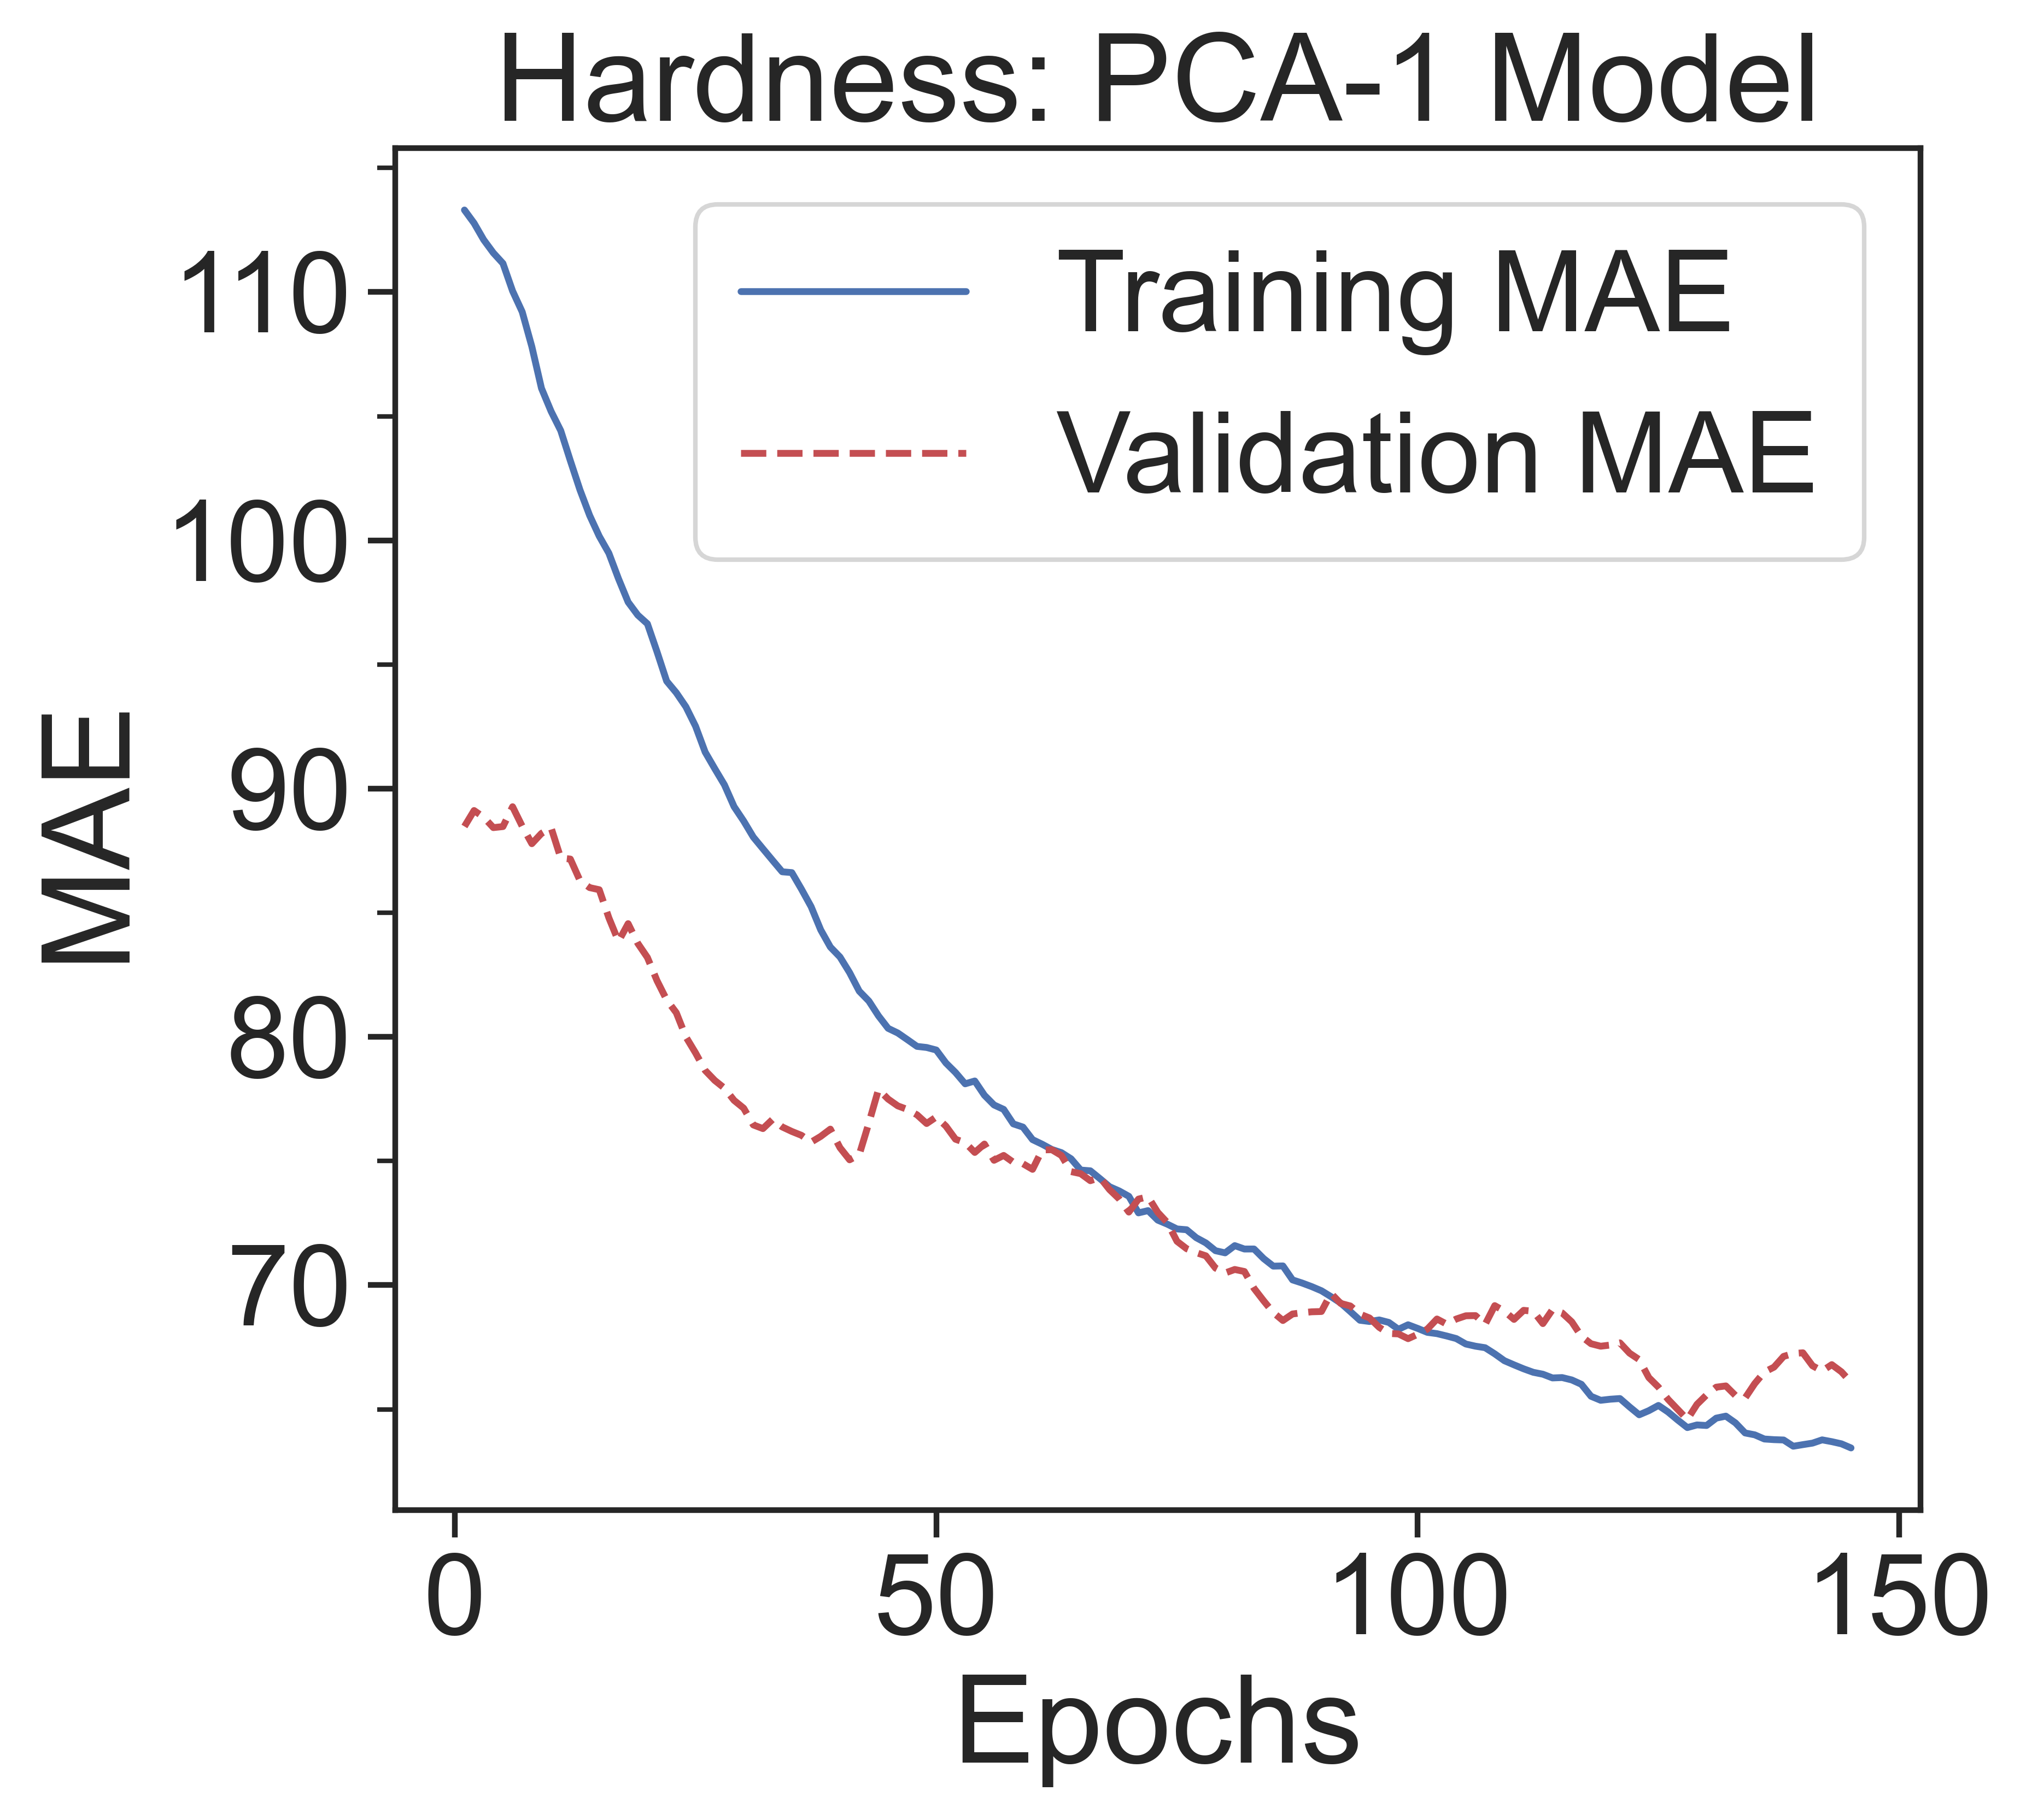

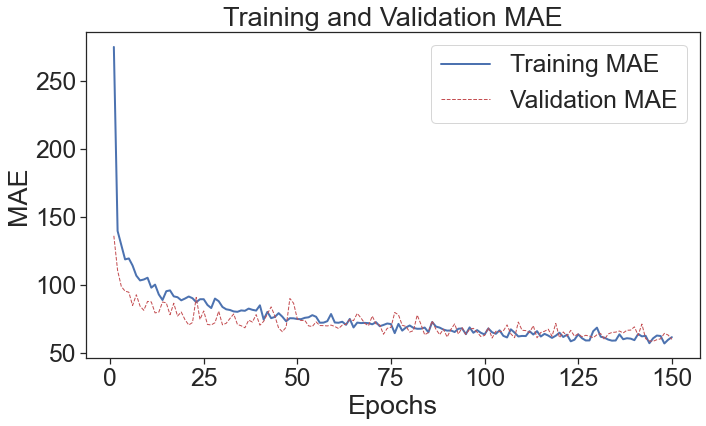

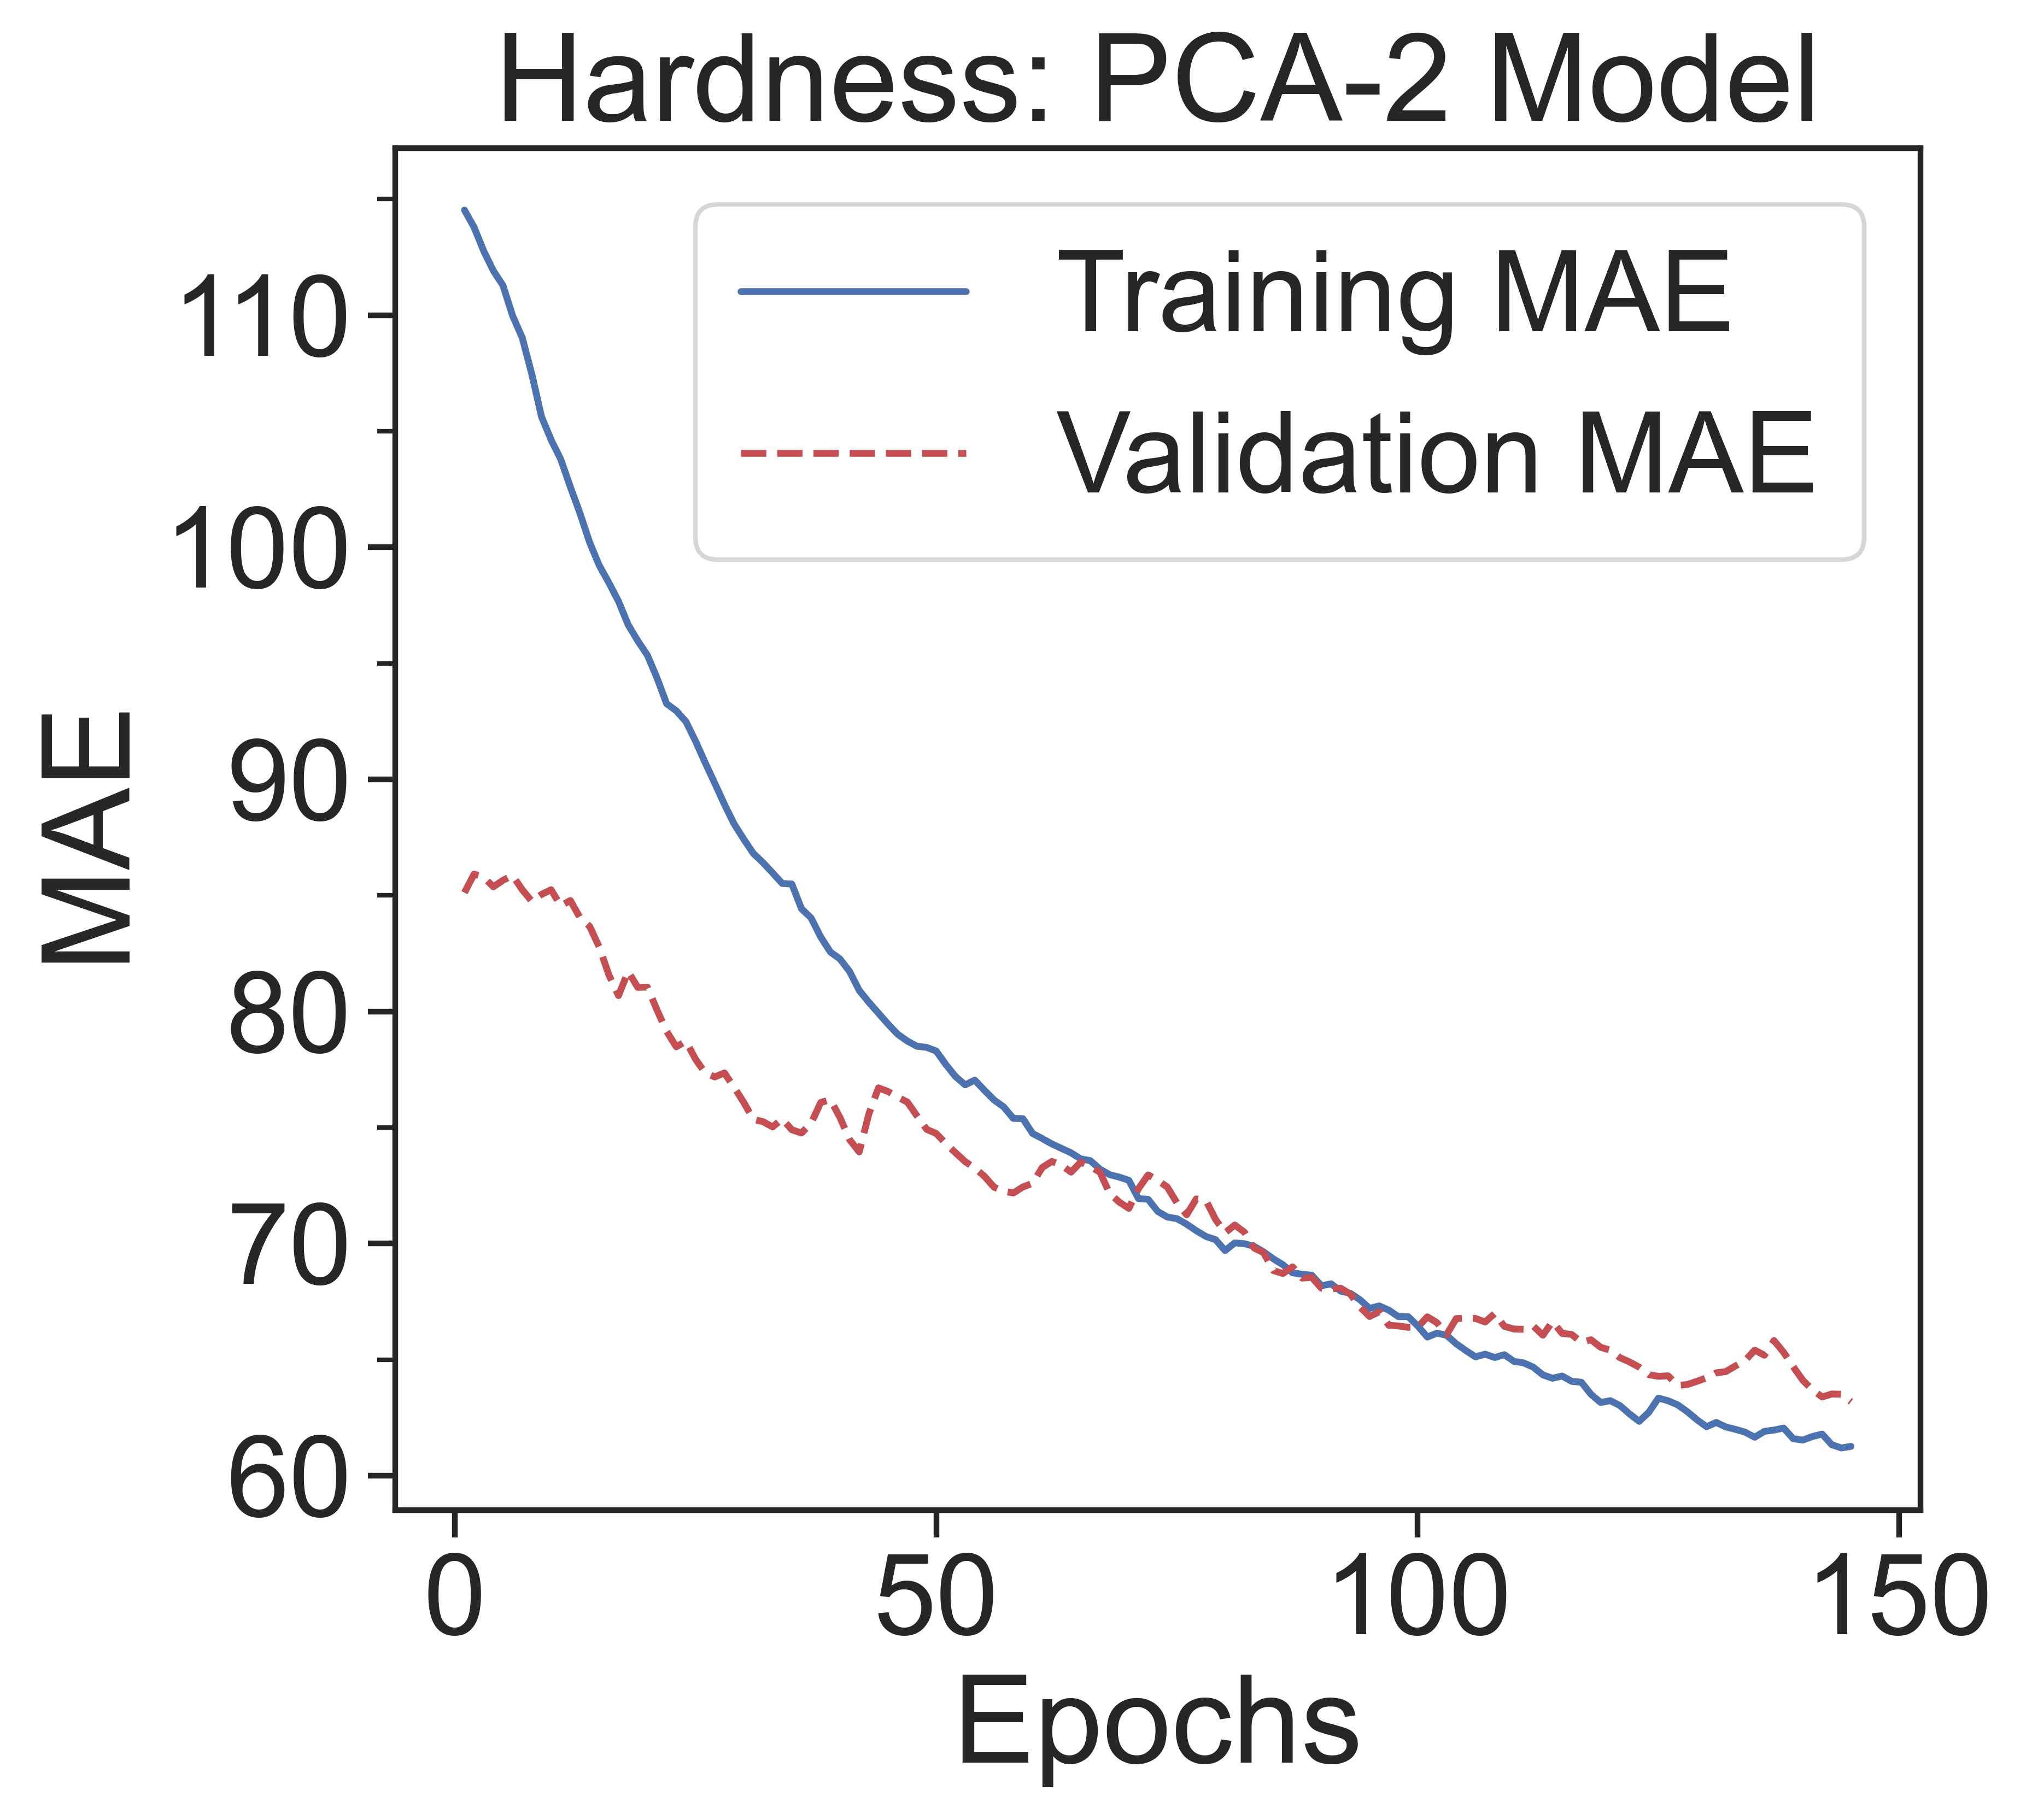

In [53]:
%run common_functions.ipynb
matrics_plot(history_pcc_1,history_pcc_1.history['mae'],history_pcc_1.history['val_mae'],"MAE","PCC-1 Model", "Hardness",plot_path)

matrics_plot(history_pcc_2,history_pcc_2.history['mae'],history_pcc_2.history['val_mae'],"MAE","PCC-2 Model", "Hardness",plot_path)

matrics_plot(history_pca_1,history_pca_1.history['mae'],history_pca_1.history['val_mae'],"MAE", "PCA-1 Model", "Hardness",plot_path)

matrics_plot(history_pca_2,history_pca_2.history['mae'],history_pca_2.history['val_mae'],"MAE", "PCA-2 Model", "Hardness",plot_path)

# Ensemble NN Model

## Ensemble model with "load_model", model at the end of the epochs

In [54]:
%run common_functions.ipynb
load_model_pcc_1 = load_model(path+'model_pcc_1.h5')
load_model_pcc_2 = load_model(path+'model_pcc_2.h5')
load_model_pca_1 = load_model(path+'model_pca_1.h5')
load_model_pca_2 = load_model(path+'model_pca_2.h5')

load_models = [load_model_pcc_1,load_model_pcc_2, load_model_pca_1, load_model_pca_2]

test_datasets = [test_pcc_1,test_pcc_2, test_pca_1, test_pca_2]


preds_array = ensemble_model(load_models, test_datasets,y_test)

R sq. for Model 0 0.8261567628440125
R sq. for Model 1 0.8156533506702415
R sq. for Model 2 0.805408031385509
R sq. for Model 3 0.8102569309756256
Average: 0.8549711340918649
Max $R^2$ of  0.8580369641868743  obained with w1= 0.3  w2= 0.3  w3= 0.1  and w4= 0.3


## Running Ensemble model with the ideal weights

Results of sklearn.metrics:
MAE: 52.69504029647164
MSE: 4596.954257433783
RMSE: 67.800842601208
MAPE: 0.14445982662033555
R-Squared: 0.8580369641868743
Test R2 score:  0.8580369641868743


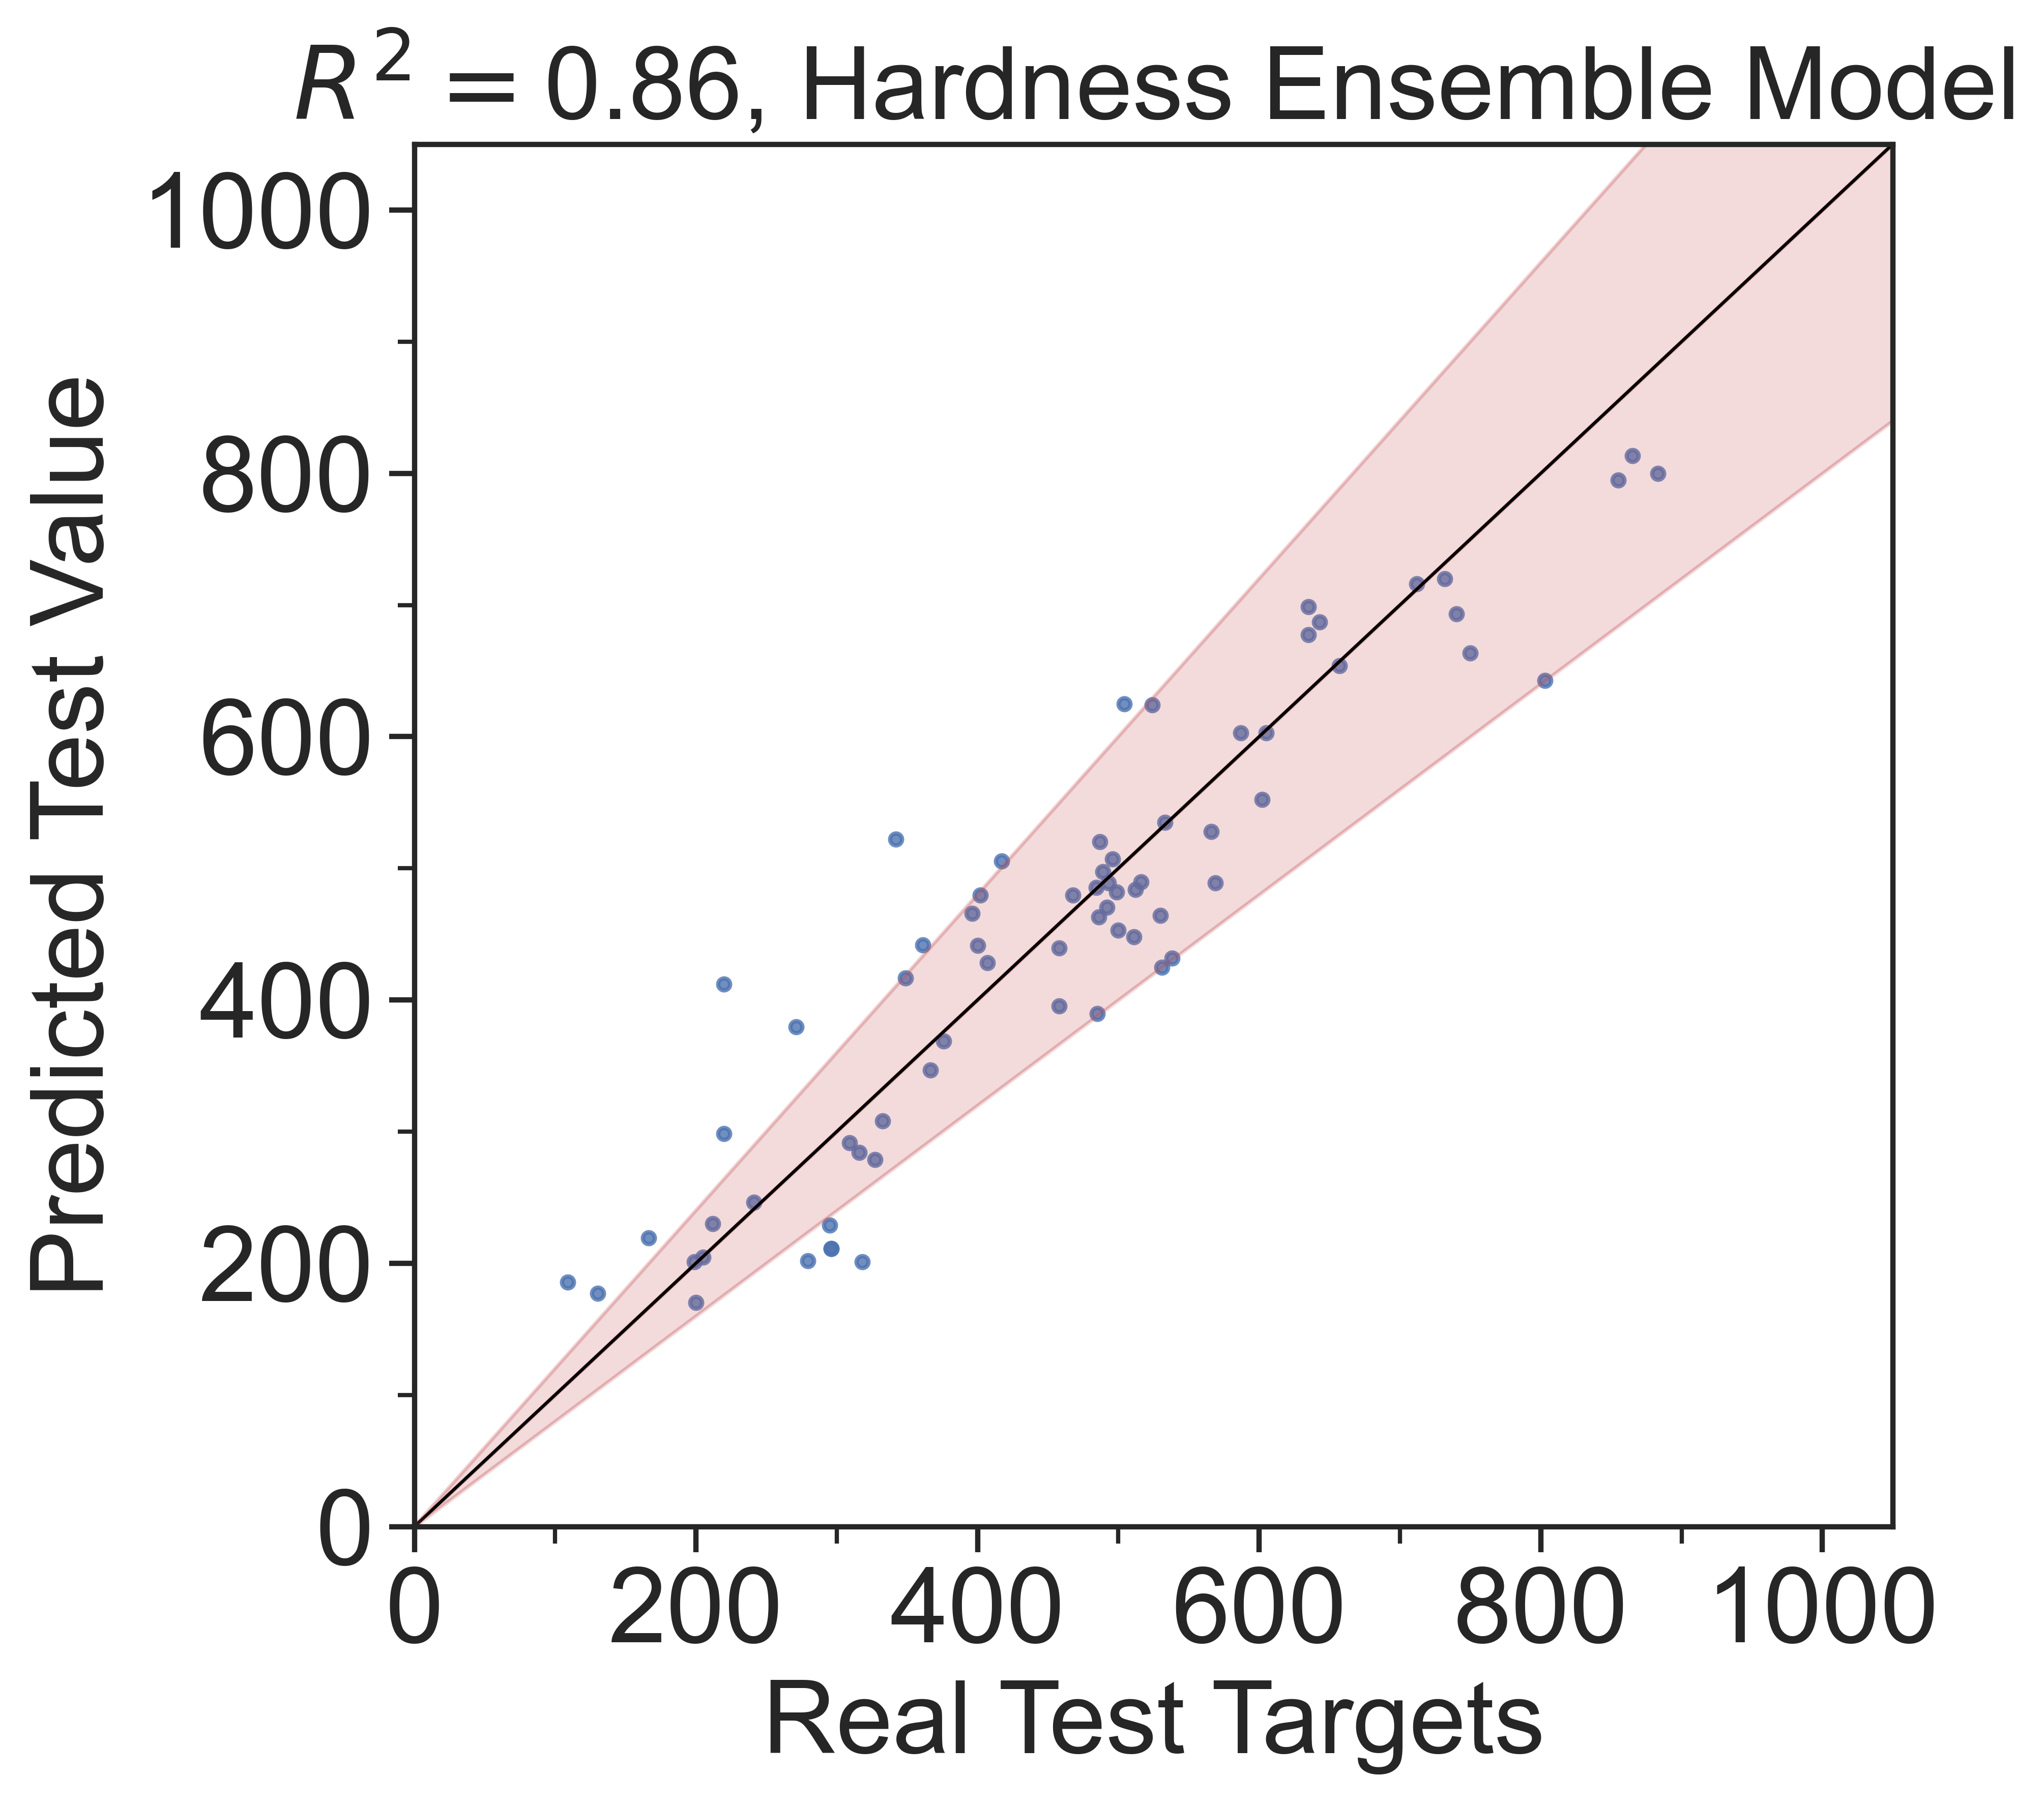

In [55]:
%run common_functions.ipynb
ideal_weights = [0.3,0.3, 0.1, 0.3] 
weighted_ensemble(preds_array, ideal_weights,y_test,plot_path="plots\\hardness\\", plot_title=", Hardness Ensemble Model",limit_value1=1200,limit_value2=1050,value_gap=200)

## Ensemble model with "best_model", model with best val_rmse

In [56]:
%run common_functions.ipynb
best_model_pcc_1 = load_model(path+'best_model_pcc_1.h5')
best_model_pcc_2 = load_model(path+'best_model_pcc_2.h5')
best_model_pca_1 = load_model(path+'best_model_pca_1.h5')
best_model_pca_2 = load_model(path+'best_model_pca_2.h5')

best_models = [best_model_pcc_1,best_model_pcc_2, best_model_pca_1, best_model_pca_2]

#test_datasets = [std_test_pcc_1, test_pca_1, test_pca_2]


preds_array = ensemble_model(best_models, test_datasets,y_test)

R sq. for Model 0 0.8221019044435169
R sq. for Model 1 0.8410961452181027
R sq. for Model 2 0.8241026433433402
R sq. for Model 3 0.8488218518297805
Average: 0.8746689142257696
Max $R^2$ of  0.8770884457490518  obained with w1= 0.2  w2= 0.3  w3= 0.2  and w4= 0.3


## Running Ensemble model with the ideal weights

Results of sklearn.metrics:
MAE: 50.12799813090891
MSE: 3980.041631016311
RMSE: 63.08757112947297
MAPE: 0.14215567452554806
R-Squared: 0.8770884457490518
Test R2 score:  0.8770884457490518


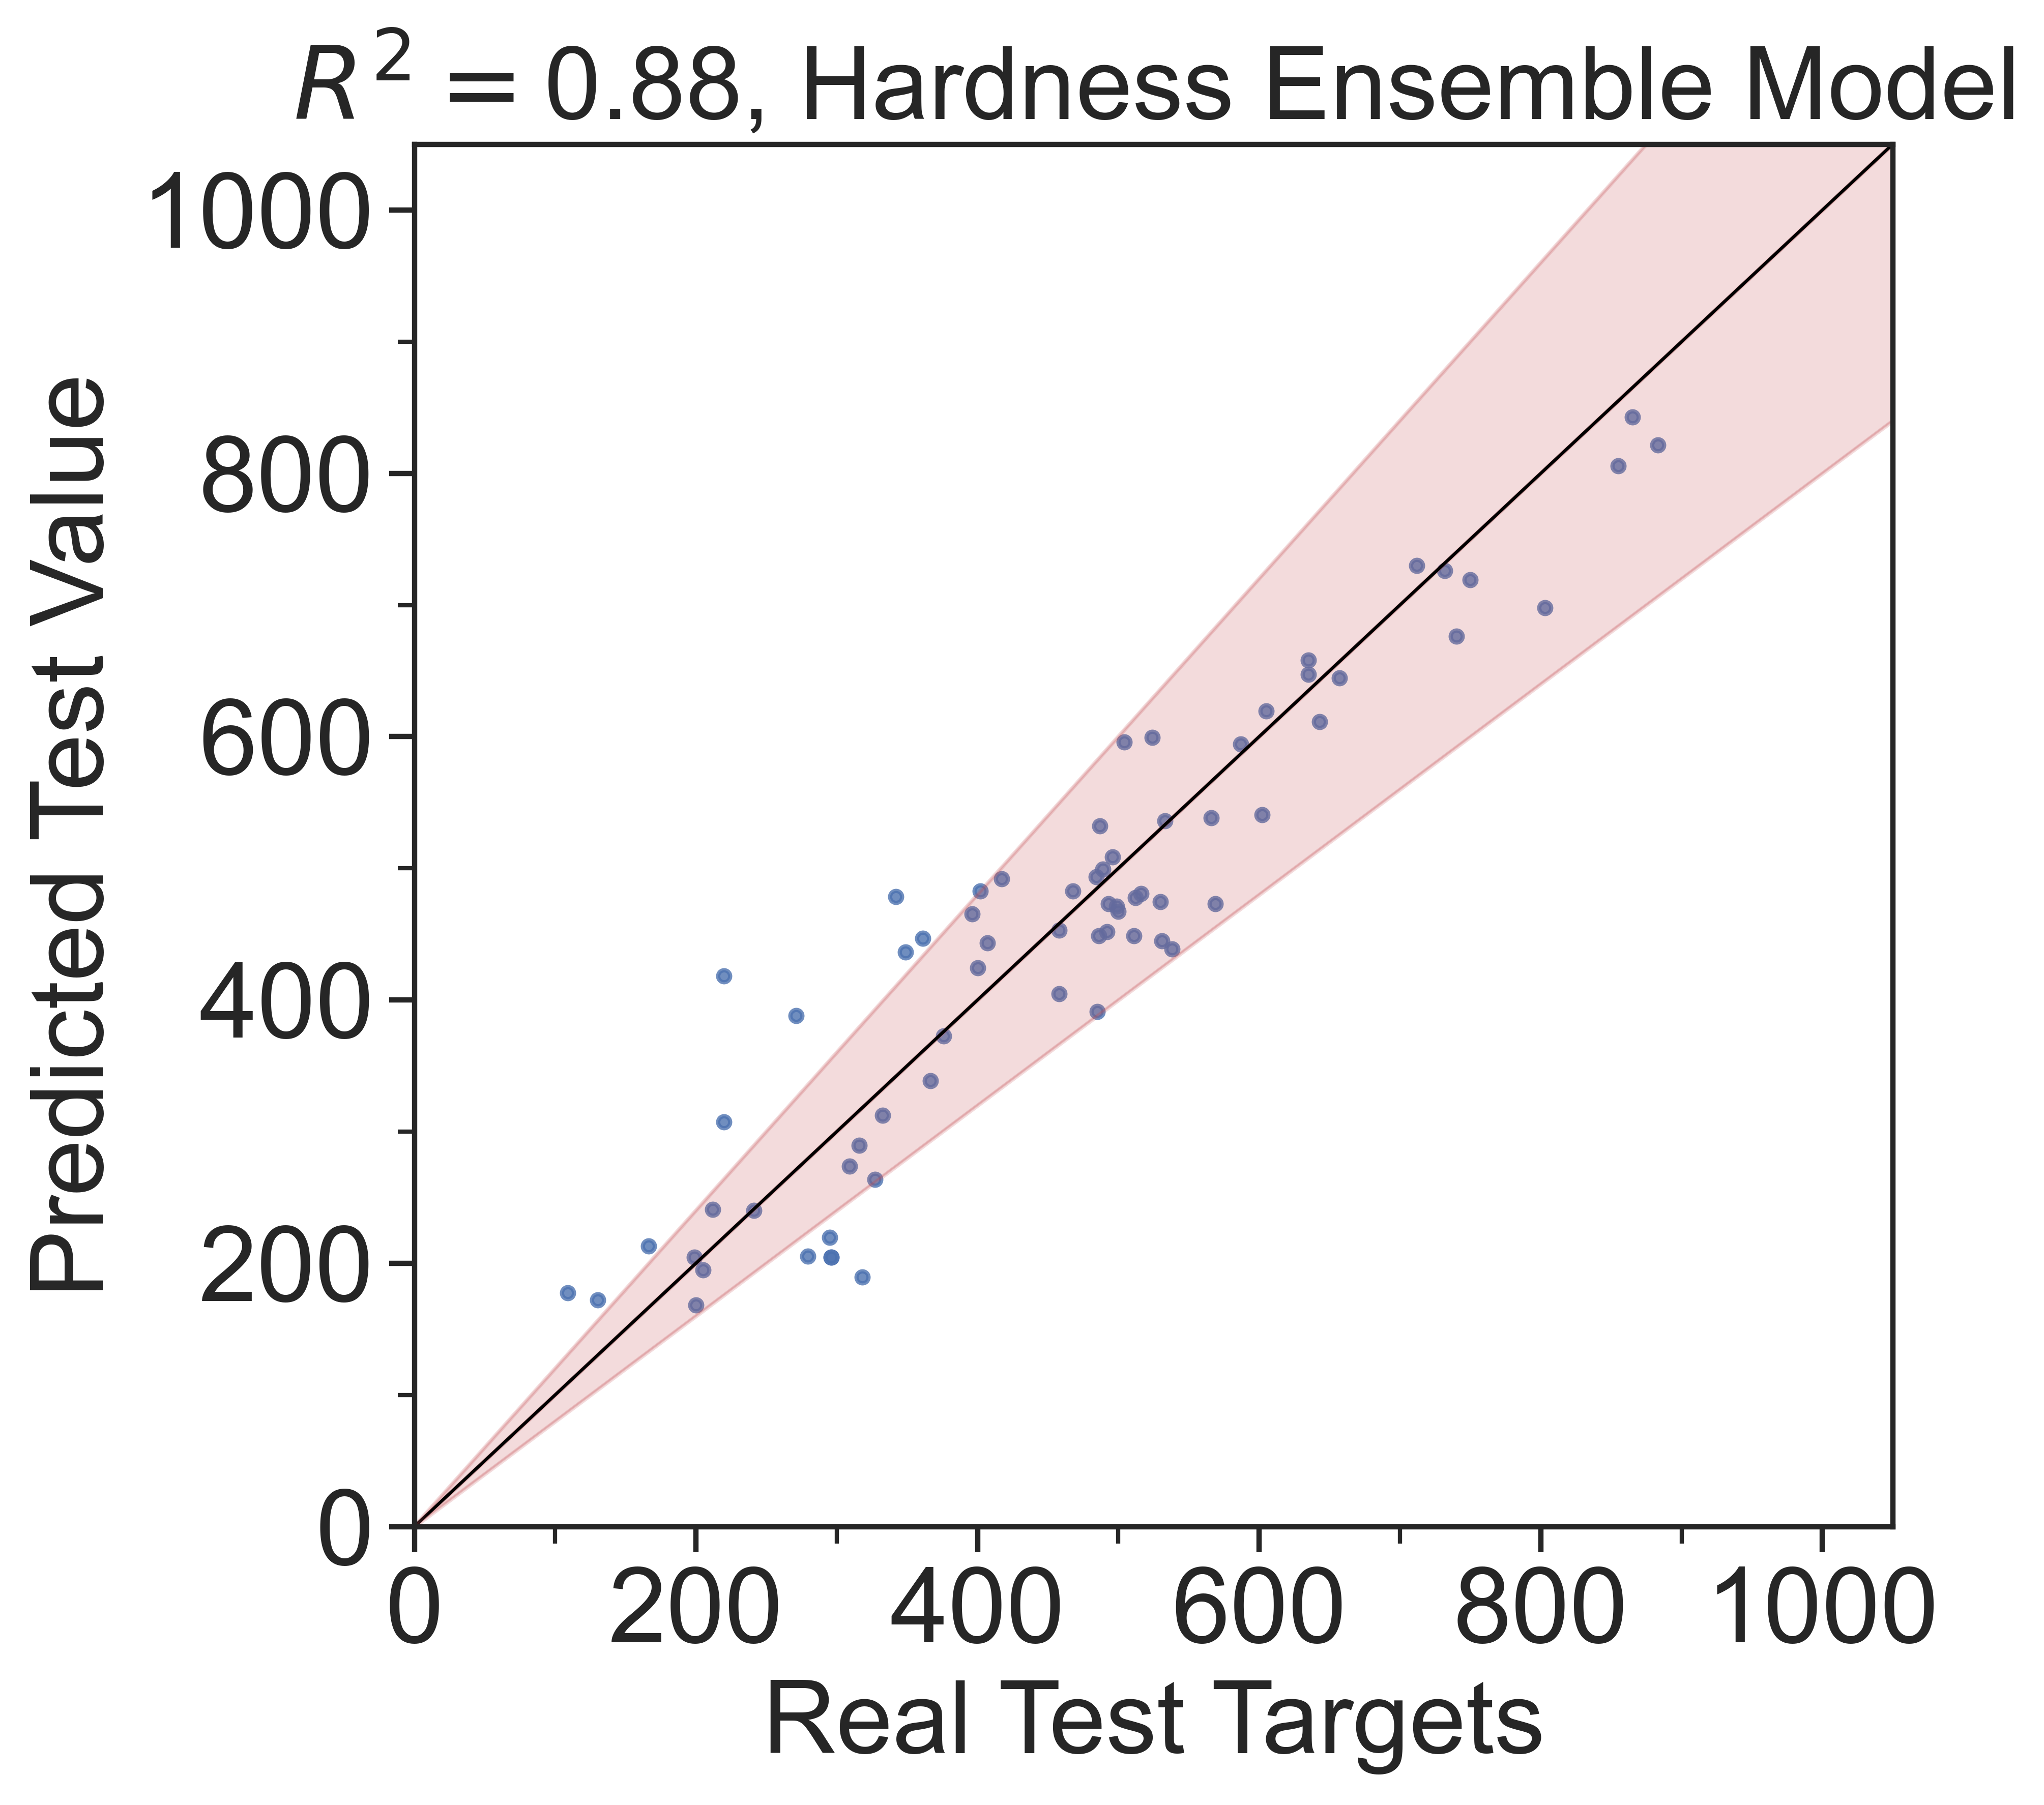

In [57]:
%run common_functions.ipynb
ideal_weights = [0.2,0.3, 0.2, 0.3] 
weighted_ensemble(preds_array, ideal_weights,y_test,plot_path="plots\\hardness\\", plot_title=", Hardness Ensemble Model",limit_value1=1200,limit_value2=1050,value_gap=200)